## Исследование данных о российском кинопрокате



Целью настоящего исследования является изучение рынка российского кинопроката, прежде всего, фильмов с государственной поддержкой, выявление текущих трендов и взаимосвязей. Попытаемся проанализировать, насколько такие фильмы интересны зрителю.

Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

Исследование данных о российском кинопрокате будет осуществлено следующим порядком:
* объединение имеющихся данных в один датафрейм,  изучение данных;
* предобработка данных, включая изменение типа данных на корректный там, где необходимо, обработку дубликатов и пропущенных значений, анализ категориальных и количественных значений на предмет аномалий, исправление проблемных значений;
* добавление столбцов с данными, необходимыми для дальнейшего анализа;
* исследовательский анализ данных, формулирование гипотез и выводов.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

# загрузим настройку, преобразующую отображение чисел
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
# открываем файлы с данными
movies = pd.read_csv('/datasets/mkrf_movies.csv')
shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
# выведем на экран первые строки датафрейма movies
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
# выведем на экран первые строки датафрейма shows
shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [5]:
# выведем на экран информацию о датафрейме movies
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
# выведем на экран информацию о датафрейме shows
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Таблица movies содержит следующую информацию из реестра прокатных удостоверений:

    title — название фильма;
    puNumber — номер прокатного удостоверения;
    show_start_date — дата премьеры фильма;
    type — тип фильма;
    film_studio — студия-производитель;
    production_country — страна-производитель;
    director — режиссёр;
    producer — продюсер;
    age_restriction — возрастная категория;
    refundable_support — объём возвратных средств государственной поддержки;
    nonrefundable_support — объём невозвратных средств государственной поддержки;
    financing_source — источник государственного финансирования;
    budget — общий бюджет фильма;
    ratings — рейтинг фильма на КиноПоиске;
    genres — жанр фильма.

Таблица shows содержит следующие сведения о показах фильмов в российских кинотеатрах:

    puNumber — номер прокатного удостоверения;
    box_office — сборы в рублях.
   

В таблице movies в столбце puNumber есть строковое значение, которое мешает приведению в целочисленный формат. Найдем его:

In [7]:
movies.puNumber = pd.to_numeric(movies.puNumber, errors='coerce')
movies[movies.puNumber.isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),NaN,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# удалим выявленную строку и присвоим столбцу puNumber целочисленный формат
movies.dropna(subset=['puNumber'], axis=0, inplace=True)
movies['puNumber'] = movies['puNumber'].astype(int)

In [9]:
# объединим таблицы
data = movies.merge(shows, on='puNumber', how='left')

In [10]:
# выведем случайные строки объединенной таблицы
data.sample(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5681,Короче,121028717,2018-02-01T12:00:00.000Z,Художественный,"Эд Оминем Интерпрайзис, Аннапурна Пикчерз, Пар...",Норвегия - США,Александр Пэйн,"Джим Берк, Марк Джонсон, Меган Эллисон",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.6,"фантастика,фэнтези,драма","124,478,239.21"
1797,12 месяцев,111003613,2013-08-23T12:00:00.000Z,Художественный,"ООО Производственная компания ""ГофроПак"", ООО ...",Россия,А.Баршак,"М.Боев, Л.Могилевский, А.Калинкин, В.Пономаренко",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,4.9,комедия,"10,745.00"
7229,"С любовью, Антоша",126004319,2019-09-16T12:00:00.000Z,Прочие,Луркер,США,Гаррет Прайс,"Дрейк Доримус, Адам Гиббс, Чип Хэмилтон",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.3,"документальный,биография","891,517.50"
3290,Дочь Бога,121020316,2016-07-11T12:00:00.000Z,Художественный,"Компани Филмз, Эмметт/Фуриа Филмз, Фортитьюд И...",США,Деклан Дэйл,"Робин Герлэнд, Ги Малик Линтон, Киану Ривз",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,4.7,"триллер,драма,криминал","1,735,656.20"
6404,Птицы в гнезде - до осени,112012618,2018-11-15T12:00:00.000Z,Документальный,"ООО ""Студия 9 марта""",Россия,Г.Калинина,Г.Калинина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4698,Женщина-кошка,221167710,2010-12-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Пикчерз, Ди Но...",США-Австралия,Питоф,"Эдвард Л.Макдоннелл, Дэниз Ди Нови",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.8,"фэнтези,боевик,криминал",NaN
7215,Малефисента: Владычица тьмы,121026219,2019-10-04T12:00:00.000Z,Художественный,"Рот Филмз, Уолт Дисней Пикчерз",США,Йоаким Роннинг,"Анджелина Джоли, Джо Рот, Дункан Хендерсон",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"фэнтези,приключения,семейный","1,911,944,865.95"
5611,Стряпуха,111010117,2017-11-22T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Э.Кеосаян,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.1,"мелодрама,комедия",NaN
3723,Без ума от Тиффани,126002816,2016-05-23T12:00:00.000Z,Прочие,"Грувистрейнджис, Квикзотик Эндиворс",США,Мэттью Миле,"Джастин Бэйр, Клайв Гершон, Барбара Раггьянти",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.7,документальный,"1,467,311.50"
3585,Амун,111017616,2016-12-01T12:00:00.000Z,Художественный,"ООО ""ТПО ""РОК""",Россия,А.Аббасов,"А.Учитель, К.Саксаганская",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.2,"приключения,биография,драма",NaN


In [11]:
# выведем информацию о количестве строк и столбцов
shape = data.shape 

print('Количество строк:', shape[0]) 
print('Количество столбцов:', shape[1]) 

Количество строк: 7485
Количество столбцов: 16


In [12]:
# приведем название столбца puNumber к корректному виду
data.rename(columns = {'puNumber':'pu_number'}, inplace=True)

In [13]:
# выведем информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   pu_number              7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Вывод**

В таблице **shows** содержалось 3158 значений в столбце box_office, как видим, все они были перенесены.

По результатам проведенного объединения получена новая таблица data со следующими столбцами:

    title — название фильма;
    pu_number — номер прокатного удостоверения;
    show_start_date — дата премьеры фильма;
    type — тип фильма;
    film_studio — студия-производитель;
    production_country — страна-производитель;
    director — режиссёр;
    producer — продюсер;
    age_restriction — возрастная категория;
    refundable_support — объём возвратных средств государственной поддержки;
    nonrefundable_support — объём невозвратных средств государственной поддержки;
    financing_source — источник государственного финансирования;
    budget — общий бюджет фильма;
    ratings — рейтинг фильма на КиноПоиске;
    genres — жанр фильма;
    box_office — сборы в рублях.
   

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [14]:
# переведем столбец show_start_date в формат даты
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

# изменим тип данных столбца ratings
data['ratings']=pd.to_numeric(data['ratings'],errors='coerce')

# проверим, как изменились типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7485 non-null   object        
 1   pu_number              7485 non-null   int64         
 2   show_start_date        7485 non-null   datetime64[ns]
 3   type                   7485 non-null   object        
 4   film_studio            7467 non-null   object        
 5   production_country     7483 non-null   object        
 6   director               7476 non-null   object        
 7   producer               6917 non-null   object        
 8   age_restriction        7485 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

Типы данных изменены на корректные там, где это было необходимо.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [16]:
# выведем информацию о долях пропущенных значений по столбцам, для удобства переведем в %
data.isna().mean().sort_values(ascending=False)*100

refundable_support      95.56
nonrefundable_support   95.56
budget                  95.56
financing_source        95.56
box_office              57.81
ratings                 13.29
genres                  13.03
producer                 7.59
film_studio              0.24
director                 0.12
production_country       0.03
title                    0.00
pu_number                0.00
show_start_date          0.00
type                     0.00
age_restriction          0.00
dtype: float64

- Основная доля пропусков приходится на столбцы refundable_support, nonrefundable_support, budget, financing_source - 95,6%. Предполагаю, что только 4,4% от общего числа фильмов были сняты с государственной поддержкой. Пропущенные значения целесообразно не заполнять;
- box_office: заполнять пропуски нецелесообразно, поскольку пропущено большое количество данных, заполнение количественным значением исказит данные;
- ratings: возможно, для формирования рейтинга на Кинопоиске недостаточно оценок, предлагаю оставить пропуски;
- genres: пропущены значения различных фильмов, для целей дальнейшего анализа целесообразно оставить пропуски;
- producer: большинство пропущенных значений приходится фильмы производства киностудии "Мосфильм". Предположительно, для фильмов данной киностудии не указан конкретный продюсер. Заполним пропуски, приходящиеся на фильмы производства киностудии "Мосфильм", наименованием киностудии, остальные пропуски заполним значением "неизвестен";
- film_studio: актуализируем пропущенные значения в соответствии с текущими сведениями на Кинопоиске. Как было выявлено, пропущены значения у короткометражных, документальных и научно-популярных фильмов. Отсутствующие значения заменим на "отсутствует";
- director: в основном пропущены значения у записей концертов или выступлений, заменим пропуски на "неизвестен";
- production_country: заменим пропуски на данные из открытых источников.

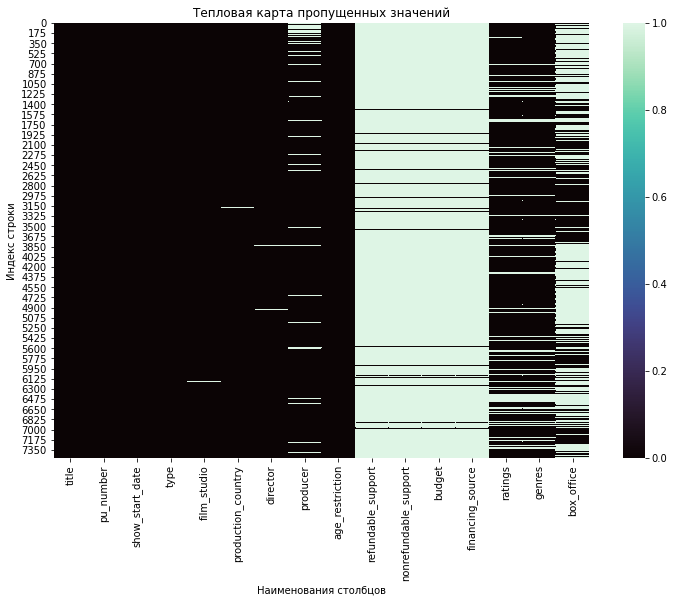

In [17]:
fig = plt.figure(figsize=(12,8))

sns.heatmap(data.isna(), cmap=sns.color_palette("mako", as_cmap=True))

plt.title('Тепловая карта пропущенных значений', fontsize=12)
plt.ylabel('Индекс строки')
plt.xlabel('Наименования столбцов')
plt.show()

Как видно из тепловой карты пропущенных значений, значения refundable_support, nonrefundable_support, budget, financing_source заполнены построчно для конкретных фильмов. Предположение, что указанные столбцы заполнены для фильмов с государственной поддержкой, корректно.

In [18]:
# выведем информацию о киностудиях для фильмов с пропущенным значением в столбце producer
data.loc[data['producer'].isna() == True].film_studio.value_counts()

Киностудия "Мосфильм"                                               338
Свердловская киностудия                                              10
Артс Альянс Дистрибьюшн                                               8
Эр А И Синема                                                         7
Опус Арт                                                              5
                                                                   ... 
АНО "Киностудия Хакасфильм"                                           1
Майоров Сергей Викторович                                             1
ООО "Дальневосточная киностудия"                                      1
Мирамакс, Дименшн Филмс                                               1
Киностудия "Мосфильм", "ПРО ДИС ФИЛЬМ АГ", "МЕДИТЕРРАНЕ СИНЕМА"       1
Name: film_studio, Length: 176, dtype: int64

In [19]:
# заполним пропуски в столбце producer наименованием киностудии
data.loc[(data['film_studio'] == 'Киностудия "Мосфильм"') & (data['producer'].isna()), 'producer'] = \
data['producer'].fillna('Киностудия "Мосфильм"')
# остальные пропуски заполним значением "неизвестен"
data.loc[(data['film_studio'] != 'Киностудия "Мосфильм"') & (data['producer'].isna()), 'producer'] = \
data['producer'].fillna('неизвестен')

In [20]:
# выведем информацию о пропусках в столбце film_studio
data.loc[data['film_studio'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,неизвестен,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6484,До и После,112014418,2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# восстановим пропущенные значения по данным Кинопоиска там, где это возможно
data.loc[1293, 'film_studio'] = 'Biscuit Pictures, Contemptible Entertainment, Mission Filmworks'
data.loc[4440, 'film_studio'] = 'Concept Space / Prostranstvo Idey'
data.loc[6104, 'film_studio'] = 'Pravda Films'
data.loc[6180, 'film_studio'] = 'Продюсерский центр «Молодёжные инициативы»'
data.loc[6493, 'film_studio'] = 'Anniko Films'

# остальные пропуски заполним значением "неизвестен"
data['film_studio'] = data['film_studio'].fillna('отсутствует')

In [22]:
# выведем информацию о пропусках в столбце director
data.loc[data['director'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,неизвестен,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,неизвестен,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,неизвестен,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,Concept Space / Prostranstvo Idey,NaN,NaN,неизвестен,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Как видим, пропущены значения у записей концертов или выступлений, заменим пропуски на "неизвестен":

In [23]:
data['director'] = data['director'].fillna('неизвестен')

In [24]:
# выведем информацию о пропусках в столбце production_country
data.loc[data['production_country'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,Concept Space / Prostranstvo Idey,NaN,неизвестен,неизвестен,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [25]:
# восстановим пропущенные значения по данным Кинопоиска
data.loc[3185, 'production_country'] = 'Россия'
data.loc[4440, 'production_country'] = 'Россия'

In [26]:
# выведем информацию о пропущенных значениях после проведенной обработки
data.isna().sum().sort_values(ascending=False)

refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
box_office               4327
ratings                   995
genres                    975
title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
dtype: int64

**Вывод** 

По результатам проведенной обработки пропущенных значений были устранены пропуски в столбцах **producer, film_studio, director, production_country**. В столбцах **refundable_support, nonrefundable_support, budget, financing_source, box_office, ratings** и **genres** пропущенные значения заполнять нецелесообразно по причине отсутствия данных или же большого количества пропущенных значений для восстановления данных вручную.

За время с 2019 года информация о содержащихся в датасете фильмах на Кинопоиске претерпела изменения, вероятнее всего, данные более качественные, для более полного анализа целесообразно было бы актуализировать данные.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [27]:
# проверим данные на наличие явных дубликатов
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

In [28]:
# выведем информацию о дубликатах в столбце pu_number
data['pu_number'].duplicated().sum()

2

In [29]:
# выведем строки с дублирующимися номерами прокатных удостоверений
data[data.duplicated(subset=['pu_number'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Проверим на официальном сайте Министерства культуры Российской Федерации действительность указанных номеров прокатных удостоверений:

*221154310*

https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/522105/

https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/522107/

*221054410*

https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/527875/

https://culture.gov.ru/services/reestr-prokatnykh-udostovereniy/527877/


Как видно из представленных данных, 2 различных фильма действительно имеют один номер прокатного удостоверения. Вероятно, это связано с технической ошибкой при присвоении номера в реестре. Предлагаю оставить номера прокатных удостоверений без изменений.


In [30]:
# выведем информацию о дубликатах в столбце title
data[data.duplicated(subset=['title'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7449,В тихом омуте,121036919,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


In [31]:
# узнаем максимальное количество дублирующихся наименований фильмов
data['title'].value_counts().head(20)

День святого Валентина_                                        5
Шерлок Холмс                                                   4
Дорога /По новелле Кормака МкКарфи/                            4
Дом грёз                                                       4
Знакомство с Факерами 2.                                       4
Секс в большом городе 2                                        4
Кошки против собак: Месть Китти Галор                          4
Красавчик-2                                                    4
Белая мгла /По комиксу Грега Рукка и Стива Либера/             4
Прощание                                                       4
Там, где живут чудовища                                        4
Не брать живым /По книге Раджива Чандрасекарана/               4
Жена путешественника во времени                                4
Код доступа "Кейптаун"                                         4
Рапунцель: Запутанная история                                  4
Дитя тьмы                

В соответствии с пояснениями Минкультуры России по вопросу правоприменения Правил выдачи, отказа в выдаче и отзыва прокатных удостоверений на фильмы  "...**на один фильм** может быть выдано **несколько прокатных удостоверений** лицензиатам на соответствующие способы использования фильма (при этом срок действия каждого прокатного удостоверения будет ограничиваться сроком действия соответствующего лицензионного договора)." (https://culture.gov.ru/press/news/poyasneniya-minkultury-rossii-po-voprosu-pravoprim/)

Вместе с тем, удаление дублирующихся значений может привести к потере значимых данных, таких как информация о государственной поддержке или кассовых сборов. Так как в дальнейшем предполагается фильтрация фильмов с кассовыми сборами, а также с государственной поддержкой, наличие дубликатов в названиях фильмов не повлияет на качество данных.


**Вывод**

Явные дубликаты отсутствуют. Выявлены дублирующиеся значения в столбцах **pu_number** и **title**. Вероятно, наличие дубликатов в столбце с номерами прокатных удостоверений связано с технической ошибкой при присвоении номера в реестре. Наличие дублирующихся значений в столбце title обусловлено тем, что на один фильм может быть выдано несколько прокатных удостоверений лицензиатам на соответствующие способы использования фильма.

При этом указанные дубликаты не влияют на качество данных, предлагаю их оставить.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

**Столбец type**

In [34]:
# выведем перечень уникальных значений в столбце type
set(data['type'].unique())

{' Анимационный',
 ' Художественный',
 'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный'}

Типы фильмов "Анимационный" и "Художественный" имеют дубликаты по причине наличия пробелов в наименованиях. Устраним лишние пробелы:

In [35]:
data['type'] = data['type'].str.strip()

In [36]:
# повторно выведем перечень уникальных значений в столбце type
set(data['type'].unique())

{'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный'}

Лишние пробелы были устранены.

**Столбец film_studio**

In [37]:
# выведем информацию о столбце film_studio
data['film_studio'].describe()

count                      7485
unique                     5496
top       Киностудия "Мосфильм"
freq                        341
Name: film_studio, dtype: object

Количество уникальных значений - 5456. Проведем работу по устранению лишних пробелов:

In [38]:
data['film_studio'] = data['film_studio'].str.strip()

In [39]:
# повторно выведем информацию о столбце film_studio
data['film_studio'].describe()

count                      7485
unique                     5468
top       Киностудия "Мосфильм"
freq                        345
Name: film_studio, dtype: object

Количество уникальных значений - 5389. В результате проведенной обработки устранено 67 дубликатов.

**Столбец production_country**

In [40]:
# выведем информацию о столбце production_country
data['production_country'].describe()

count     7485
unique     950
top        США
freq      2172
Name: production_country, dtype: object

Количество уникальных значений - 945.

In [41]:
# выведем перечень уникальных значений в столбце 
set(data['production_country'].unique())

{' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Германия - 

In [42]:
# выведем строку с аномальным значением в столбце production_country
data.query('production_country == "2019"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7246,Дело Коллини,121027219,2019-09-19 12:00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"детектив,драма,криминал",NaN


In [43]:
# проведем замену аномальгого значения 2019 на корректное и уберем лишние пробелы
data['production_country'] = data['production_country'].str.replace('2019','Германия')\
                                                       .str.strip()

In [44]:
# повторно выведем информацию о столбце film_studio
data['production_country'].describe()

count     7485
unique     933
top        США
freq      2175
Name: production_country, dtype: object

Количество уникальных значений - 928. В результате проведенной обработки устранено 17 дубликатов.

**Столбец director**

In [45]:
# выведем информацию о столбце director
data['director'].describe()

count           7485
unique          4812
top       О.Семёнова
freq              47
Name: director, dtype: object

Количество уникальных значений - 4794. 

In [46]:
# выведем перечень уникальных значений в столбце 
sorted(set(data['director'].unique()))

[' Йохан Нийенхейс',
 ' Н.Орлов, Р.Быков',
 ' Р.Асхаев',
 ' Т.Саакян',
 ' Ф.Бондарчук',
 'Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано ',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Басаев',
 'А.

In [47]:
# уберем лишние пробелы в наименованиях
data['director'] = data['director'].str.strip()

In [48]:
# повторно выведем информацию о столбце director
data['director'].describe()

count           7485
unique          4802
top       О.Семёнова
freq              60
Name: director, dtype: object

Количество уникальных значений - 4784. В результате проведенной обработки устранено 10 дубликатов.

**Столбец producer**

In [49]:
# выведем информацию о столбце producer
data['producer'].describe()

count                      7485
unique                     5351
top       Киностудия "Мосфильм"
freq                        338
Name: producer, dtype: object

Количество уникальных значений - 5316.

In [50]:
# выведем перечень уникальных значений в столбце
sorted(set(data['producer'].unique()))

[' А.Шальопа',
 ' Г.Шпригов',
 ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
 ' И.Гелашвили',
 ' К.Шахназаров, А.Златопольский',
 ' Мишель Чиджик, Джефф Абберли, Натали Марисано',
 ' ООО "Арт Пикчерс Студия"',
 ' ООО "Арт Пикчерс Студия", ФГУП "ВГТРК"',
 ' ООО "КиноФирма"',
 ' ФГУП "Киноконцерн "Мосфильм"',
 '"Фонд Михаила Калатозова"',
 'Ёсиаки Нисимура, Джеффри Уэкслер',
 'А. Калюжный',
 'А. Натахин',
 'А.А.Эшпай',
 'А.Аболс',
 'А.Адамская',
 'А.Адраникян, В.Горяинов',
 'А.Ананикян',
 'А.Ананикян, Г.Андреасян, С.Андреасян',
 'А.Ананикян, С.Андреасян, Г.Андреасян',
 'А.Аствацатрян, С.Сельянов',
 'А.Атанесян, А.Кириллин, Л.Тарасов',
 'А.Атанесян, М.Бабаханов, Р.Бутко',
 'А.Атанесян, Р.Атоян',
 'А.Балашов',
 'А.Барыкин',
 'А.Барыкин, В.Братухин, О.Суров',
 'А.Басов',
 'А.Белов',
 'А.Берденников',
 'А.Бессчетнова, М.Евдокимова, А.Куренков',
 'А.Бзаров',
 'А.Бик, П.Бранкати, Ф.Будвег, М.де Конинг, П.А.Марион, Г.Мендеш, М.Ситер, ',
 'А.Б

In [51]:
# уберем лишние пробелы в наименованиях
data['producer'] = data['producer'].str.strip()

In [52]:
# повторно выведем информацию о столбце producer
data['producer'].describe()

count                      7485
unique                     5336
top       Киностудия "Мосфильм"
freq                        338
Name: producer, dtype: object

Количество уникальных значений - 5301. В результате проведенной обработки устранено 15 дубликатов.

**Столбцы age_restriction, financing_source, genres**

In [53]:
set(data['age_restriction'].unique())

{'«0+» - для любой зрительской аудитории',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет'}

In [54]:
set(data['financing_source'].unique())

{nan, 'Министерство культуры', 'Министерство культуры, Фонд кино', 'Фонд кино'}

In [55]:
set(data['genres'].unique())

{nan,
 'аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'боевик,драма,

В столбцах age_restriction, financing_source, genres лишних пробелов в значениях не выявлено.

**Вывод**

Общая проблема исследуемых категориальных данных заключается во множественности значений в строках, что делает невозможным анализ без выделения отдельных столбцов с "главным" значением. Чем и займемся в последующей части проекта.

Выявлено, что в значениях столбцов type, film_studio, production_country, director и producer присутствовали пробелы в начале и (или) конце строки. В столбцах age_restriction, financing_source, genres лишних пробелов в значениях не выявлено.

Проведена работа по устранению лишних пробелов в категориальных значениях столбцов. Предположительно, лишние пробелы были связаны с техническими ошибками при вводе или выгрузке, поскольку данные без учета пробелов достаточно качественные.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [56]:
# выведем случайные 20 строк данных о фильмах с государственной поддержкой
data.query('refundable_support > 0 or nonrefundable_support > 0').sample(20)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2662,Пионеры-герои.,111008315,2015-04-27 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""",Россия,Н.Кудряшова,С.Сельянов,«16+» - для детей старше 16 лет,0.00,"15,000,000.00","27,000,000.00",Министерство культуры,5.90,драма,"1,109,238.00"
5918,Русалка. Озеро мертвых,111007618,2018-06-07 12:00:00,Художественный,"ООО ""СТГ МЕДИА"" по заказу ООО ""Киностудия КИТ""",Россия,С.Подгаевский,"ООО ""Киностудия КИТ""",«16+» - для детей старше 16 лет,"8,000,000.00","20,000,000.00","42,000,000.00",Фонд кино,4.60,"фэнтези,ужасы","100,874,704.69"
5516,Конверт,111007217,2017-11-30 12:00:00,Художественный,"ООО ""РБ ПРОДАКШН""",Россия,В.Марков,К.Буслов,«16+» - для детей старше 16 лет,"5,000,000.00","30,000,000.00","74,275,100.00",Фонд кино,5.60,"триллер,ужасы","7,189,790.00"
2947,ВСЯ НАША НАДЕЖДА...,111007716,2016-04-22 12:00:00,Художественный,"ООО ""Продюсерский центр ""Парадиз""",Россия,К.Геворкян,"Г.Нерсисян, А.Манасарян, А.Гюлумян, Д.Кулаков",«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,200,000.00",Министерство культуры,7.20,"драма,мелодрама","35,897.00"
5869,Кислота,111004818,2018-06-07 12:00:00,Художественный,"ООО ""Студия ""СЛОН""",Россия,А.Горчилин,С.Еремеева,«18+» - запрещено для детей,0.00,"25,000,000.00","37,600,000.00",Министерство культуры,6.20,драма,"21,522,348.20"
7253,Герой,111015819,2019-09-26 12:00:00,Художественный,"ООО ""Карго""",Россия,К.Оганисян,К.Оганисян,«12+» - для детей старше 12 лет,"20,000,000.00","100,000,000.00","250,000,000.00",Фонд кино,7.90,"фэнтези,боевик,драма","172,871,342.04"
7252,Волшебник,111016219,2019-10-03 12:00:00,Художественный,"ООО ""Медиа Юниверсал""",Россия,М.Морсков,"Б.Анисимов, И.Магомедов, В.Маслов",«12+» - для детей старше 12 лет,0.00,"25,000,000.00","40,000,000.00",Министерство культуры,7.10,"фэнтези,драма,детектив","13,848,461.92"
3474,Петербург. Только по любви,111009516,2016-06-01 12:00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,"А.Пармас, Н.Кудряшова, А.Гогленкова, Н.Назаров...","Э.Пичугин, С.Сельянов, Н.Дрозд, Н.Смирнова",«16+» - для детей старше 16 лет,0.00,"30,000,000.00","57,874,375.00",Министерство культуры,6.20,"комедия,мелодрама","16,814,329.46"
2939,Тэли и Толи,111005916,2016-03-30 12:00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн""",Россия,А.Амиров,"Н.Иванова, М.Ксинопуло",«12+» - для детей старше 12 лет,0.00,"25,200,000.00","37,889,165.00","Министерство культуры, Фонд кино",6.20,"комедия,мелодрама","1,301,350.50"
6156,Странники терпенья,111015518,2018-10-18 12:00:00,Художественный,"ООО ""Кинокомпания ""Спутник""",Россия,В.Алеников,"ООО ""Кинокомпания ""Спутник"", ООО ""Киноспутник""",«16+» - для детей старше 16 лет,0.00,"30,000,000.00","70,305,000.00",Министерство культуры,5.50,"триллер,драма","238,858.00"


Выявлено значение "0" в столбце budget при наличии государственной поддержки. Выведем все строки с указанной ошибкой:

In [57]:
data.query('budget == 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


In [58]:
# заполним ошибочные значения, где это возможно, по данным Кинопоиска
data.loc[2057, 'budget'] = 140000000
data.loc[2471, 'budget'] = 115000000
data.loc[2531, 'budget'] = 60000000
data.loc[2614, 'budget'] = 1000000000
data.loc[2787, 'budget'] = (1400000*61.1)
data.loc[3564, 'budget'] = 380000000
data.loc[3738, 'budget'] = 50000000 
data.loc[5672, 'budget'] = 115000000
data.loc[6322, 'budget'] = 220000000

Пропущенные значения, которые невозможно заполнить данные информацией Кинопоиска, удалим:

In [59]:
data = data[data['budget'] != 0]

In [60]:
# Проверим, сколько удалено строк датасета и финансовых данных
data_set = data.copy()           # создаем копию текущего датасета
a, b  = len(temp), len(data_set)
print(f'Количество строк исходное {a}, Количество строк после обработки {b}, % потерянных строк', round((a-b)/a*100, 2))
fin_list = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
for i in fin_list:
    temp1, temp2 = data_set[i].sum(), temp[i].sum()
    temp3 = len(temp[temp[i] > 0])-len(data_set[data_set[i] > 0])
    print(f'Колонка {i}: сумма исходная {temp1}, после обработки {temp2}, удалено фильмов с данными {temp3}')

Количество строк исходное 7485, Количество строк после обработки 7477, % потерянных строк 0.11
Колонка refundable_support: сумма исходная 3790000000.0, после обработки 3939000000.0, удалено фильмов с данными 5
Колонка nonrefundable_support: сумма исходная 15882688312.0, после обработки 16261688312.0, удалено фильмов с данными 8
Колонка budget: сумма исходная 44405805939.0, после обработки 42240265939.0, удалено фильмов с данными -9
Колонка box_office: сумма исходная 241029273268.13, после обработки 241519722477.13, удалено фильмов с данными 8


In [61]:
# проверим устранение пропущенных значений
data.query('budget == 0')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Пропущенные значения обработаны.

**Проанализируем данные в столбцах budget, refundable_support, nonrefundable_support и box_office:**

In [62]:
# для анализа введем переменную, в которой содержатся данные только о фильмах с государственной поддержкой 
gov_support = data.query('budget > 0')

In [63]:
# выведем информацию о данных в столбце budget, для удобства переведем в млн руб 
(gov_support['budget']/1000000).describe()

count     324.00
mean      137.05
std       195.24
min        14.46
25%        46.16
50%        74.59
75%       150.04
max     2,305.07
Name: budget, dtype: float64

Минимальное значение - 14,46 млн руб., максимальное значение - 2,3 млрд рублей. При этом 50% выборки находятся в интервале от 46 до 150 млн рублей.

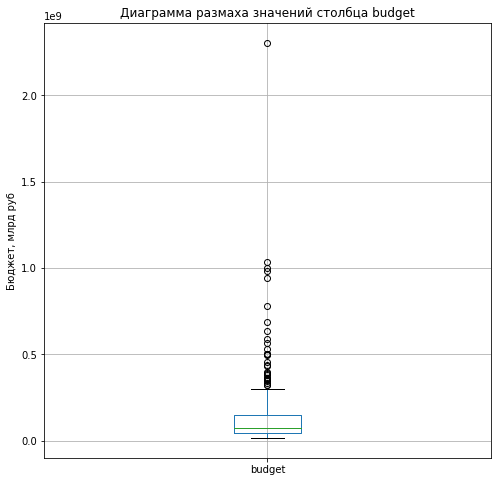

In [64]:
# построим диаграмму размаха
fig = plt.figure(figsize=(8,8))
gov_support.boxplot('budget')

plt.title('Диаграмма размаха значений столбца budget', fontsize=12)
plt.ylabel('Бюджет, млрд руб')

plt.show()

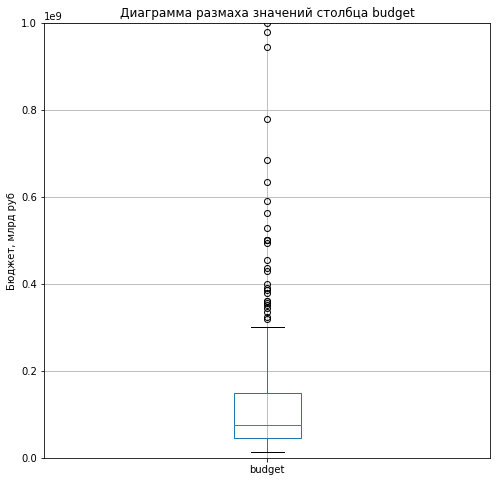

In [65]:
# повторно построим диаграмму размаха, уменьшив значения по оси у до 1 млрд руб
fig = plt.figure(figsize=(8,8))
gov_support.boxplot('budget')

plt.ylim(0, 1000000000)

plt.title('Диаграмма размаха значений столбца budget', fontsize=12)
plt.ylabel('Бюджет, млрд руб')

plt.show()

На основании представленной диаграммы можно сделать вывод, что верхняя граница нормального распределения соответствует 300 млн рублей, при этом наблюдается "хвост" до 1 млрд рублей, а также единственное значение в размере 2,3 млрд рублей.

Выведем информацию о фильмах с бюджетом выше 300 млн рублей:

In [66]:
gov_support.query('budget > 300000000')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2091,Батальонъ,111000715,2015-01-29 12:00:00,Художественный,"ООО ""Корнер Ворк"", ООО ""Арт Пикчерс Студия""",Россия,Д.Месхиев,И.Угольников,«12+» - для детей старше 12 лет,0.00,"56,579,055.00","436,437,176.00","Министерство культуры, Фонд кино",7.10,"драма,военный,история","451,812,221.70"
2141,Территория,111000515,2015-01-27 12:00:00,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,"30,000,000.00","30,000,000.00","500,000,000.00",Фонд кино,6.80,"детектив,фэнтези,триллер","72,578,317.40"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","1,000,000,000.00",Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2698,Он - Дракон,111017915,2015-10-14 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,И.Джендубаев,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.00,"250,000,000.00","360,000,000.00",Фонд кино,6.80,фэнтези,"110,171,448.50"
2919,Экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00","392,104,482.00","635,283,867.00",Фонд кино,7.60,"драма,триллер,приключения","1,402,255,390.00"
3041,Крякнутые каникулы,114003615,2015-12-22 12:00:00,Анимационный,"ООО ""Анимационная студия РИМ""",Россия,В.Лакисов,"Р.Атоян, В.Зорин, О.Бровченко",«6+» - для детей старше 6 лет,"40,000,000.00",0.00,"399,075,326.00",Фонд кино,5.40,"мультфильм,комедия,приключения","69,693,747.93"
3254,Время первых (2017),111001317,2017-02-21 12:00:00,Художественный,"ООО ""ТаББаК"", ООО ""Студия Третий Рим""",Россия,Д.Киселев,"Т.Бекмамбетов, Е.Миронов",«6+» - для детей старше 6 лет,"75,000,000.00","175,000,000.00","528,441,977.00",Фонд кино,7.50,"приключения,триллер,биография","544,332,260.00"
3350,Дуэлянт,111015416,2016-09-14 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.00","300,000,000.00","684,200,536.00",Фонд кино,6.60,драма,"364,285,139.60"
3452,Ледокол,111016316,2016-10-11 12:00:00,Художественный,"ООО ""Продюсерская фирма Игоря Толстунова""",Россия,Н.Хомерики,"И.Толстунов, С.Козлов",«12+» - для детей старше 12 лет,"100,000,000.00","200,000,000.00","430,000,000.00",Фонд кино,6.50,драма,"337,069,662.80"
3461,Защитники,111000717,2017-01-24 12:00:00,Художественный,"ООО ""Энджой мувиз"", ООО ""РЕНОВАЦИО интертейнмент""",Россия,С.Андреасян,"С.Андреасян, Г.Андреасян, В.Поляков, А.Рязанцев",«12+» - для детей старше 12 лет,"50,000,000.00","150,000,000.00","323,232,109.00",Фонд кино,3.00,"фантастика,фэнтези,боевик","262,040,254.00"


Фильмы с бюджетом выше 300 млн рублей не являются аномальными, для целей анализа предлагаю не ограничивать поля с данными о бюджете границами нормального распределения.

Далее проанализируем данные в столбцах refundable_support и nonrefundable_support. Фильмам может предоставляться как возратная, так и безвозвратная поддержка, поэтому в данных содержатся закономерные пропуски. Для целей анализа выберем данные без пропусков.

In [67]:
# выведем информацию о данных в столбце refundable_support, для удобства переведем в млн руб
(gov_support.query('refundable_support > 0').refundable_support/1000000).describe()

count   106.00
mean     35.75
std      32.46
min       3.50
25%      15.00
50%      25.00
75%      50.00
max     180.00
Name: refundable_support, dtype: float64

Минимальное значение - 3,5 млн руб., максимальное значение - 180 млн рублей. При этом 50% выборки находятся в интервале от 15 до 50 млн рублей.

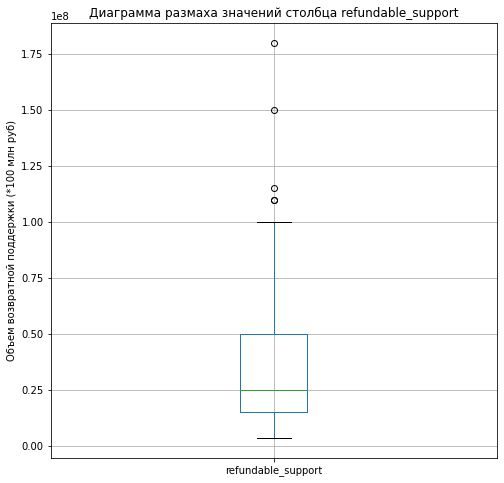

In [68]:
# построим диаграмму размаха
fig = plt.figure(figsize=(8,8))

gov_support.query('refundable_support > 0').boxplot('refundable_support')

plt.title('Диаграмма размаха значений столбца refundable_support', fontsize=12)
plt.ylabel('Объем возвратной поддержки (*100 млн руб)')

plt.show()

Верхняя граница нормального распределения - 100 млн рублей. 

Проверим, являются ли фильмы с возвратной поддержкой свыше 100 млн рублей аномальными:

In [69]:
gov_support.query('refundable_support > 100000000')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3163,Герой (2015),111000416,2016-01-22 12:00:00,Художественный,"ООО ""Студия 25"", ООО ""Медиа Арт Студио"", ООО ""...",Россия,Ю.Васильев,"Э.Айнулова, Н.Дорошкевич, М.Журомская",«12+» - для детей старше 12 лет,"110,000,000.00","30,000,000.00","222,177,790.00","Министерство культуры, Фонд кино",7.10,"мюзикл,боевик,драма","81,430,626.82"
3350,Дуэлянт,111015416,2016-09-14 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.00","300,000,000.00","684,200,536.00",Фонд кино,6.60,драма,"364,285,139.60"
5436,Матильда,111005717,2017-08-17 12:00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00","190,000,000.00","1,032,905,957.00",Фонд кино,7.70,"фэнтези,комедия,семейный","511,775,548.00"
6471,Три богатыря и наследница престола,114008818,2018-12-15 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Бронзит,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"115,000,000.00",0.00,"185,500,705.00",Фонд кино,6.50,"мультфильм,приключения,семейный","577,368,853.25"
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00","90,000,000.00","2,305,074,303.00",Фонд кино,5.80,"приключения,фэнтези","333,597,059.59"


Как видно из представленных данных, большой объем возвратного финансирования соответствует фильмам с высоким бюджетом, что не является аномалией.

In [70]:
# выведем информацию о данных в столбце nonrefundable_support, для удобства переведем в млн руб
(gov_support.query('nonrefundable_support > 0').nonrefundable_support/1000000).describe()

count   315.00
mean     50.42
std      60.78
min       3.00
25%      25.00
50%      30.00
75%      40.75
max     400.00
Name: nonrefundable_support, dtype: float64

Минимальное значение - 3,0 млн руб., максимальное значение - 400 млн рублей. При этом 50% выборки находятся в интервале от 25 до 40 млн рублей.

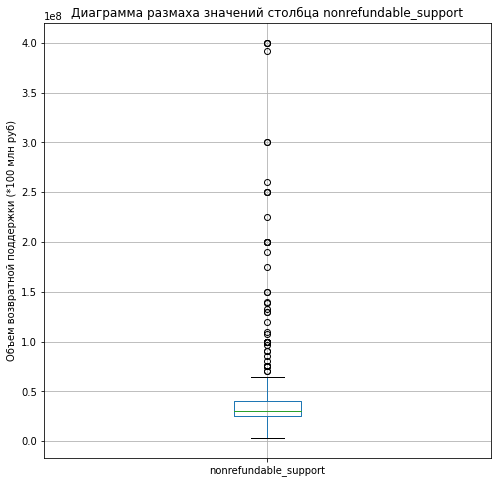

In [71]:
# построим диаграмму размаха
fig = plt.figure(figsize=(8,8))

gov_support.query('nonrefundable_support > 0').boxplot('nonrefundable_support')

plt.title('Диаграмма размаха значений столбца nonrefundable_support', fontsize=12)
plt.ylabel('Объем возвратной поддержки (*100 млн руб)')

plt.show()

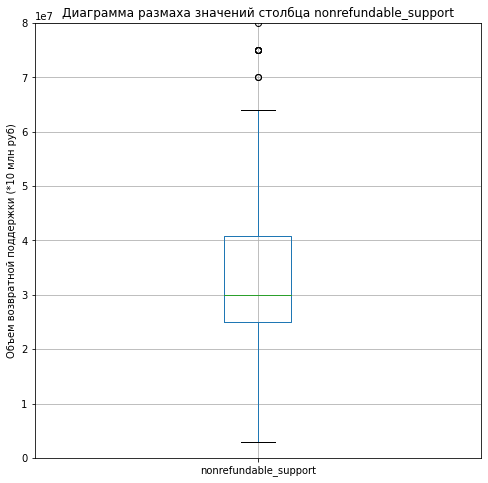

In [72]:
# повторно построим диаграмму размаха, уменьшив величину по оси у 80 000 000
fig = plt.figure(figsize=(8,8))
gov_support.query('nonrefundable_support > 0').boxplot('nonrefundable_support')

plt.ylim(0, 80000000)

plt.title('Диаграмма размаха значений столбца nonrefundable_support', fontsize=12)
plt.ylabel('Объем возвратной поддержки (*10 млн руб)')

plt.show()

Верхняя граница нормального распределения - 65 млн рублей. Далее наблюдается "хвост" значений до 300 млн рублей, а также несколько значений свыше 300 млн руб.

Проверим, являются ли фильмы с невозвратной поддержкой свыше 300 млн рублей аномальными:

In [73]:
gov_support.query('nonrefundable_support > 300000000')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2919,Экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00","392,104,482.00","635,283,867.00",Фонд кино,7.60,"драма,триллер,приключения","1,402,255,390.00"
5652,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,"400,000,000.00","590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00"
7463,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53"
7473,Вторжение,111022519,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",NaN


Как видно из представленных данных, большой объем невозвратного финансирования соответствует фильмам с высоким бюджетом, что не является аномалией.

In [74]:
# выведем информацию о данных в столбце box_office
data.query('box_office != 0').box_office.describe()

count           3,126.00
mean       77,104,693.94
std       241,473,424.15
min                40.00
25%            98,817.75
50%         2,376,338.05
75%        24,157,845.14
max     3,073,568,690.79
Name: box_office, dtype: float64

Минимальное значение - 40 руб., максимальное значение - 3,073 млрд рублей. При этом 50% выборки находятся в интервале от 98,8 тыс руб до 24,1 млн рублей.

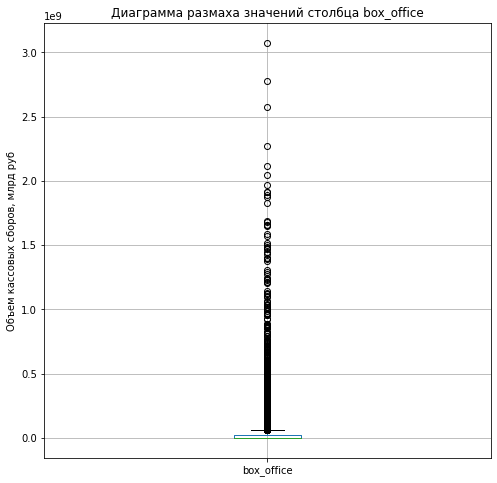

In [75]:
# построим диаграмму размаха
fig = plt.figure(figsize=(8,8))
data.query('box_office > 0').boxplot('box_office')

plt.title('Диаграмма размаха значений столбца box_office', fontsize=12)
plt.ylabel('Объем кассовых сборов, млрд руб')

plt.show()

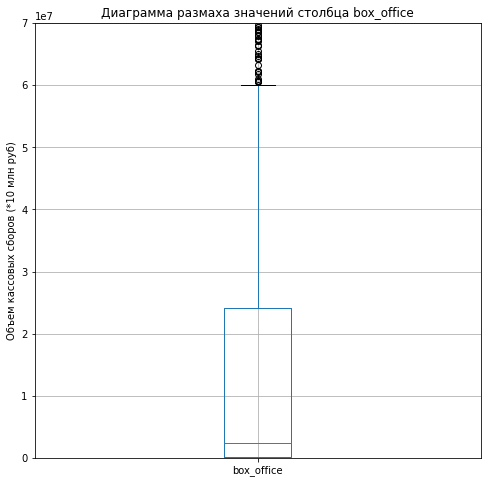

In [76]:
# повторно построим диаграмму размаха, уменьшив величину по оси у 70 000 000
fig = plt.figure(figsize=(8,8))
data.query('box_office != 0').boxplot('box_office')

plt.ylim(0, 70000000)

plt.title('Диаграмма размаха значений столбца box_office', fontsize=12)
plt.ylabel('Объем кассовых сборов (*10 млн руб)')

plt.show()

Как видим из диаграммы рассеяния, большое количество значений о величине сборов находится вне границ нормального распределения, что вполне может соответствовать реальности, ведь фильмы могут иметь абсолютно разный коммерческий успех.

In [77]:
# выведем информацию о фильмах со сборами более 1 млрд рублей
data.query('box_office > 1000000000')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1981,Седьмой сын,121026614,2014-11-11 12:00:00,Художественный,"Леджендари Пикчерз, Мовинг Пикчерз Компани, Ут...",США - Великобритания - Канада - КНР,Сергей Бодров,"Бэзил Иваник, Томас Тулл, Лайонел Уигрэм",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.80,"фэнтези,приключения","1,016,410,635.30"
2104,Форсаж 7,121001215,2015-01-27 12:00:00,Художественный,"Юниверсал Пикчерз, Релятивити Медиа, Дентсу, Ф...",США,Джеймс Ван,"Вин Дизель, Майкл Фоттрел",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"боевик,триллер,приключения","1,486,131,019.00"
2158,Мстители: Эра Альтрона,121007215,2015-04-03 12:00:00,Художественный,Марвел Студиос,США,Джосс Уидон,Кевин Фейги,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.20,"фантастика,боевик,приключения","1,500,989,281.90"
2508,Терминатор: Генезис,121012415,2015-06-11 12:00:00,Художественный,"Парамаунт Пикчерз, Скайдэнс Продакшнз",США,Алан Тэйлор,"Дэвид Эллисон, Дэна Голдберг",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.40,"фантастика,боевик,триллер","1,060,054,283.00"
2510,Монстры на каникулах 2,124003615,2015-10-15 12:00:00,Анимационный,"Коламбиа Пикчерз, ЭлСтар Кэпитал, Сони Пикчерз...",США,Геннадий Тартаковский,"Аллен Коверт, Мишель Мердокка",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.20,"мультфильм,фэнтези,комедия","1,000,157,204.40"
2577,Миньоны,124001715,2015-03-30 12:00:00,Анимационный,Иллюминейшн Интертейнмент,США,"Кайл Балда, Пьер Соффин","Кристофер Меледандри, Джанет Хили",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.20,"мультфильм,фантастика,комедия","1,646,580,645.70"
2578,Мир Юрского периода,121006515,2015-04-03 12:00:00,Художественный,"Эмблин Интертейнмент, Леджендари Пикчерз, Юнив...",США,Колин Треворроу,"Патрик Краули, Фрэнк Маршалл",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.90,"фантастика,приключения,боевик","1,211,158,990.00"
2839,Дэдпул,121002116,2016-02-03 12:00:00,Художественный,"ХХ век Фокс, Марвел Энтерпрайзиз, Тэ Эс Гэ Инт...",США - Канада,Тим Миллер,"Саймон Кинберг, Райан Рейнольдс, Лорен Шулер Д...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.50,"фантастика,боевик,комедия","1,587,516,389.00"
2858,Зверополис,124000316,2016-02-15 12:00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Рич Мур, Байрон Ховард",Кларк Спенсер,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.30,"мультфильм,комедия,криминал","2,048,126,108.00"
2919,Экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00","392,104,482.00","635,283,867.00",Фонд кино,7.60,"драма,триллер,приключения","1,402,255,390.00"


Как видим, в срез попали фильмы-блокбастеры.

**Вывод** 

Проанализированы количественные данные в столбцах **budget, refundable_support, nonrefundable_support** и **box_office**, аномальных значений не выявлено. Восстановлены пропущенные значения (0) в столбце **budget**, данные заполнены информацией Кинопоиска там, где это возможно, остальные пропущенные значения были удалены.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделали анализ количественных значений датасета.</font>

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [78]:
# создадим столбец с информацией о годе проката
data['show_start_year'] = data['show_start_date'].dt.year
# проверим корректность создания столбца
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,"Киностудия ""Мосфильм""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [79]:
# создадим собственную функцию main, добавляющую в таблицу столбец с первым значением имеющегося столбца
def main(value, new):
    for row in data:
        data[new] = data[value].astype(str).str.split(',').str[0]
        data[new] = data[new].str.strip()

# создадим столбцы main_genre и main_director
main('genres', 'main_genre')
main('director', 'main_director')

# проверим корректность 
data.sample(15)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN,2010,комедия,ХЭрольд Рэмис
1251,План побега,121024513,2013-09-27 12:00:00,Художественный,Саммит Интертейнмент,США,Микаэль Хофстрём,"Робби Бреннер, Марк Кантон, Рэндол Эмметт",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.10,"боевик,триллер",NaN,2013,боевик,Микаэль Хофстрём
2889,Логин,121003816,2016-02-15 12:00:00,Художественный,Диджитал Муви Продакшн,Венгрия,Акош Барноцкий,Джордж Дора,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,3.90,триллер,"240,602.50",2016,триллер,Акош Барноцкий
5808,Леонардо: Миссия Мона Лиза,124001418,2018-04-12 12:00:00,Анимационный,"Олл Райтс Энтертеймент, Группо Алкуни",Италия,Серджо Манфио,Фабио Теста,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.60,"мультфильм,приключения,семейный","13,717,189.49",2018,мультфильм,Серджо Манфио
3961,Небесный тихоход (новая цветная версия),111000110,2010-01-14 12:00:00,Художественный,"Киностудия ""Ленфильм"", ЗАО ""Киновидеообъединен...","СССР, Россия",И.Цветов (режиссер ч/б фильма - С.Тимошенко),"ЗАО ""Киновидеообъединение ""Крупный план""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,8.00,"комедия,военный",NaN,2010,комедия,И.Цветов (режиссер ч/б фильма - С.Тимошенко)
4092,Джули и Джулия: Готовим счастье по рецепту /По...,221055210,2010-04-14 12:00:00,Художественный,"Коламбиа Пикчерз, Изи Зер Тайгер Продакшнз, Ск...",США,Нора Эфрон,"Лоренс Марк, Эми Робинсон, Эрик Стил, Нора Эфрон",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,биография",NaN,2010,драма,Нора Эфрон
5235,Футбольные гладиаторы,221119511,2011-11-25 12:00:00,Художественный,"Эвэй Дэйз Филмз, Ред Юнион Филмз",Великобритания,Пэт Холден,Дэвид А.Хьюз,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.70,"драма,криминал",NaN,2011,драма,Пэт Холден
3110,Бруклин,121002216,2016-02-03 12:00:00,Художественный,"Фокс Серчлайт, Вилдгаз Филмз, Параллель Филм П...",Ирландия - Великобритания - Канада,Джон Краули,"Финола Двайер, Пьер Ивен, Аманда Пози",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.20,"комедия,криминал","6,754,350.01",2016,комедия,Джон Краули
774,Пока ночь не разлучит,111004312,2012-09-10 12:00:00,Художественный,"ООО ""Чапула Бэй""",Россия,Б.Хлебников,"Е.Степанищева, Е.Семин, А.Плотников, З.Болотае...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.80,"драма,комедия",NaN,2012,драма,Б.Хлебников
5224,Кунг-фу Панда 2,124000911,2011-04-28 12:00:00,Анимационный,ДримУоркс Анимэйшн,США,Дженнифер Ю,Мелисса Кобб,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.40,"мультфильм,фэнтези,боевик","94,515.00",2011,мультфильм,Дженнифер Ю


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [80]:
# создадим столбец с информацией о доле гос поддержки в общем бюджете фильма
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']
data['support_proportion'] = data['total_support'] / data['budget']
# проверим корректность создания столбца
data.query('budget > 0').head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,total_support,support_proportion
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,драма,А.Атанесян,"26,500,000.00",0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,NaN,NaN,"28,140.00",2014,nan,А.Якимчук,"26,000,000.00",0.70
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,комедия,Р.Давлетьяров,"107,847,945.00",0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,драма,Е.Миндадзе (псевдоним Катя Шагалова),"28,000,000.00",0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,драма,М.Угаров,"25,000,000.00",0.62


**Вывод** 

Добавлены новые столбцы: **show_start_year, main_genre, main_director, support_proportion**.

**Подведем итоги предобработки данных**

За время с 2019 года информация о содержащихся в датасете фильмах на Кинопоиске претерпела изменения, вероятнее всего, данные более качественные, для более полного анализа целесообразно было бы актуализировать данные. 

Типы данных изменены на корректные там, где это было необходимо. 
Проведена обработка пропущенных значений. 

Явные дубликаты отсутствуют. Выявлены дублирующиеся значения в столбцах pu_number и title. Вероятно, наличие дубликатов в столбце с номерами прокатных удостоверений связано с технической ошибкой при присвоении номера в реестре. Наличие дублирующихся значений в столбце title обусловлено тем, что на один фильм может быть выдано несколько прокатных удостоверений лицензиатам на соответствующие способы использования фильма.

Проведена работа по устранению лишних пробелов в категориальных значениях столбцов. Предположительно, лишние пробелы были связаны с техническими ошибками при вводе или выгрузке, поскольку данные без учета пробелов достаточно качественные.

Добавлены столбцы show_start_year (год проката), main_genre (основной жанр), main_director (главный режиссер), support_proportion (доля государственной поддержки от общего бюджета фильма).


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [81]:
# создадим сводную таблицу start_year, где по годам будут указаны количество фильмов общее и в кинопрокате
start_year = data.groupby('show_start_year').agg({'title':'count', 'box_office':'count'}).reset_index() 
start_year.columns = ['year', 'films_total', 'films_in_cinema']

start_year

,year,films_total,films_in_cinema
0,2010,985,105
1,2011,622,109
2,2012,593,128
3,2013,630,184
4,2014,805,278
5,2015,704,464
6,2016,816,524
7,2017,504,356
8,2018,889,473
9,2019,929,529


In [82]:
# добавим столбец с долей фильмов в кинопрокате, выразим долю в %
start_year['films_in_cinema_%'] = ((start_year['films_in_cinema']/start_year['films_total'])*100).round(3)
start_year.style.background_gradient(cmap='GnBu')

,year,films_total,films_in_cinema,films_in_cinema_%
0,2010,985,105,10.660000
1,2011,622,109,17.524000
2,2012,593,128,21.585000
3,2013,630,184,29.206000
4,2014,805,278,34.534000
5,2015,704,464,65.909000
6,2016,816,524,64.216000
7,2017,504,356,70.635000
8,2018,889,473,53.206000
9,2019,929,529,56.943000


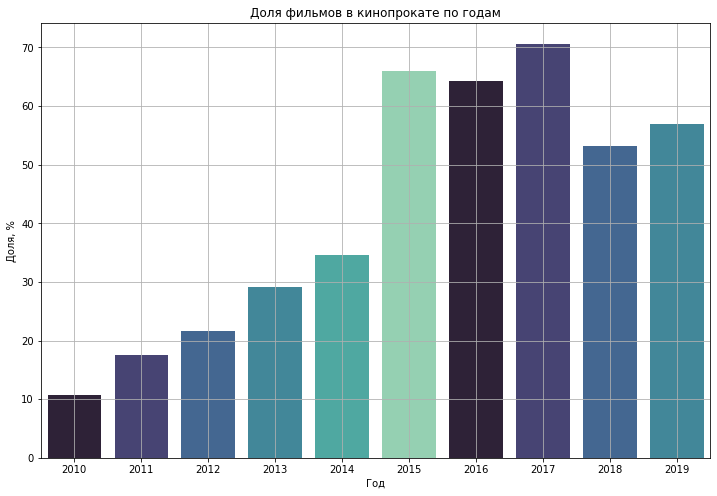

In [83]:
# визуализируем данные, построив график
fig = plt.figure(figsize=(12,8))

sns.barplot(x='year', y='films_in_cinema_%', data=start_year, palette=sns.color_palette("mako"))

plt.grid(True)

plt.title('Доля фильмов в кинопрокате по годам', fontsize=12)
plt.ylabel('Доля, %')
plt.xlabel('Год')
plt.show()

**Вывод**

Доля фильмов в кинопрокате от общего количества фильмов имела тенденцию к росту с 2010 по 2015 год - с 10,7 до 65,9%%. В 2016 году доля фильмов в кинопрокате снизилась до 64,2%. Пик приходится на 2017 год - 70,6%. В 2018 году доля фильмов в кинопрокате резко снизилась до 53,2%, в 2019 году наблюдается рост доли до 56,9%.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [84]:
# создадим сводную таблицу start_year_box_office, где по годам будут указаны объемы сборов в кинотеатрах
start_year_box_office = data.groupby('show_start_year').agg({'box_office':'sum'}).reset_index() 

start_year_box_office.style.background_gradient(cmap='GnBu')

,show_start_year,box_office
0,2010,2428654.000000
1,2011,14102765.000000
2,2012,6955423.000000
3,2013,29799706.200000
4,2014,7434717843.100000
5,2015,39495407457.890007
6,2016,47780637758.480042
7,2017,48508599202.750000
8,2018,49478522504.629990
9,2019,48278101953.079994


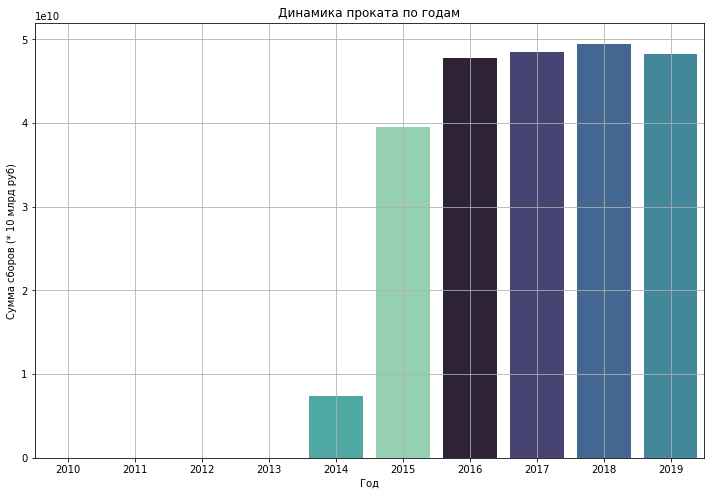

In [85]:
# визуализируем данные, построив график
fig = plt.figure(figsize=(12,8))

sns.barplot(x='show_start_year', y='box_office', data=start_year_box_office, palette=sns.color_palette("mako"))

plt.grid(True)

plt.title('Динамика проката по годам', fontsize=12)
plt.ylabel('Сумма сборов (* 10 млрд руб)')
plt.xlabel('Год')
plt.show()

**Вывод**

На основании графика можно сказать, что минимально значимые для анализа данные появляются с 2014 года. Вероятно, до 2014 года включительно данные не были внесены в полном объеме.

Наблюдается рост сумм сборов в кинопрокате с 2015 года по 2018 год - с 39,5 млрд до 49,5 млрд рублей. Вероятно, это было связано с проведением в 2016 году в Российской Федерации Года российского кино (http://www.kremlin.ru/acts/bank/40098) и соответствующими мероприятиями, направленными на поддержку российского кинопроката.

В 2019 году сборы снизились на 1,2 млрд рублей в сравнении с предыдущим годом и составили 48,3 млрд рублей.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [86]:
# создадим сводную таблицу box_office_median_mean, где по годам будут указаны средние и медианные сборы в кинотеатрах
box_office_median_mean = data.pivot_table(index='show_start_year', values='box_office', aggfunc=['mean','median']).reset_index()
box_office_median_mean.columns = ['year', 'box_office_mean', 'box_office_median']

box_office_median_mean.style.background_gradient(cmap='GnBu')

,year,box_office_mean,box_office_median
0,2010,23130.038095,1700.000000
1,2011,129383.165138,3000.000000
2,2012,54339.242188,5660.000000
3,2013,161954.925000,3522.500000
4,2014,26743589.363669,18137.500000
5,2015,85119412.624763,4946745.450000
6,2016,91184423.203206,3777202.680000
7,2017,136260110.120084,9943877.500000
8,2018,104605755.823742,8751895.750000
9,2019,91262952.652325,4601033.600000


**Вывод**

Вероятно, до 2014 года включительно данные о суммах сборов в кинопрокате не были внесены в полном объеме.
Наблюдается значительный разброс в средних и медианных значениях, что говорит об неоднородности выборки и наличии "выбросов" с низкими и высокими сборами.

Средние показатели сборов в кинотеатрах имели тенденцию к росту с 2015 по 2017 год - с 85,1 млн руб до 136,3 млн руб. В 2018 году средний показатель сборов снизился и составил 104,6 млн руб., в 2019 году средний показатель продолжил снижаться и составил 91,3 млн рублей.

Медианный показатель сборов в кинотеатрах в 2015 году составлял 4,9 млн руб, в 2016 году произошло снижение до 3,8 млн руб. Максимальный медианный показатель сборов в кинотеатрах наблюдается в 2017 году - 9,9 млн руб., с 2018 медианный показатель снижается - в 2018 году составил 8,75 млн рублей, в 2019 году - 4,6 млн руб.


In [87]:
# создадим новую переменную age_limit
age_limit = data.query('box_office > 0 & show_start_year >= 2015')
age_limit['age_restriction'] = age_limit['age_restriction'].str.split('-').str[0]
# сгруппируем суммы кассовых сборов в разрезе возрастых ограничений
age_limit_pivot = age_limit.pivot_table(index='age_restriction', values='box_office', aggfunc=['count', 'sum'])\
                           .reset_index()
age_limit_pivot.columns = ['age_restriction', 'number_of_films', 'box_office']

age_limit_pivot.sort_values(by='box_office', ascending=False)

,age_restriction,number_of_films,box_office
2,«16+»,802,"75,964,434,591.63"
1,«12+»,346,"60,604,083,696.90"
4,«6+»,313,"55,406,015,328.72"
3,«18+»,791,"40,757,657,833.61"
0,«0+»,90,"809,077,425.97"


Наибольшая сумма кассовых сборов характерна для категории «16+» - 75.96 млрд рублей. Далее идут сборы категории «12+» - 60.6 млрд рублей, «6+» - 55.4 млрд рублей, «18+» - 40,8 млрд рублей. Минимальные кассовые сборы у возрастной категории «0+» - 0,8 млрд рублей.

При этом стоит отметить, что наибольшее колиичество фильмов приходится на категорию «16+» - 802 фильма, далее на категорию «18+» - 791 фильм. На категории «12+» и «6+» приходится по 346 и 313 фильмов соответственно. Минимальное количество фильмов в категории «0+» - 90.

In [88]:
age_limit[age_limit['age_restriction'].str.contains('0+')].box_office.describe()

count            90.00
mean      8,989,749.18
std      29,150,610.19
min             100.00
25%         388,175.00
50%       2,949,626.65
75%       4,570,158.46
max     206,478,186.00
Name: box_office, dtype: float64

In [89]:
age_limit.query('box_office == 2576613776.83')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,total_support,support_proportion
6819,Мстители: Финал,121005519,2019-04-29 12:00:00,Художественный,Марвел Студиос,США,"Джо Руссо, Энтони Руссо",Кевин Фейги,«16+»,NaN,...,NaN,NaN,7.60,"фантастика,боевик,драма","2,576,613,776.83",2019,фантастика,Джо Руссо,NaN,NaN


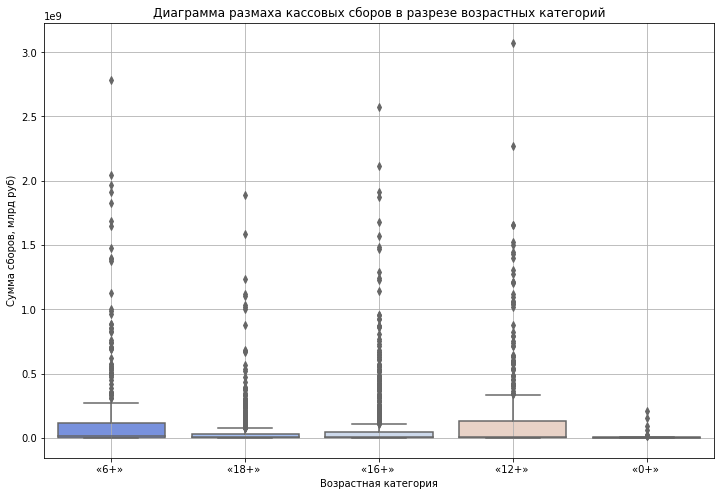

In [90]:
# построим диаграмму размаха кассовых сборов в разрезе возрастных категорий
fig = plt.figure(figsize=(12,8))

age = age_limit['age_restriction'].sort_values(ascending=False)
sns.boxplot(x=age, y=age_limit['box_office'], palette=sns.color_palette("coolwarm"))

plt.grid(True)

plt.title('Диаграмма размаха кассовых сборов в разрезе возрастных категорий', fontsize=12)
plt.ylabel('Сумма сборов, млрд руб)')
plt.xlabel('Возрастная категория')
plt.show()

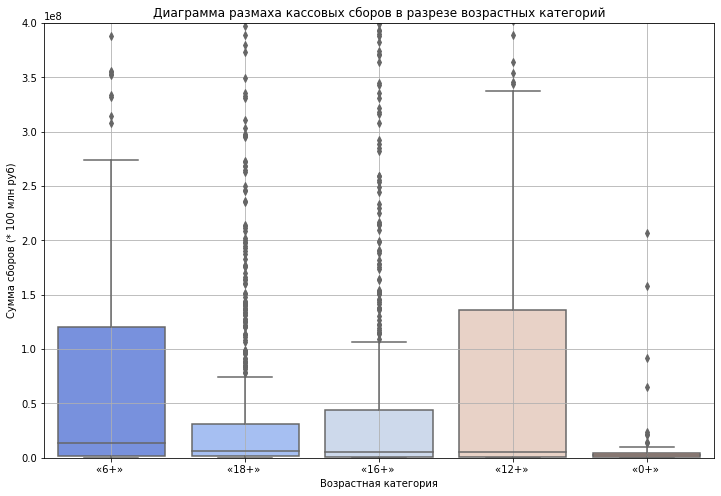

In [91]:
# построим диаграмму размаха кассовых сборов в разрезе возрастных категорий, ограничив значения по оси у 400000000
fig = plt.figure(figsize=(12,8))

age = age_limit['age_restriction'].sort_values(ascending=False)
sns.boxplot(x=age, y=age_limit['box_office'], palette=sns.color_palette("coolwarm"))

plt.grid(True)

plt.ylim(0, 400000000)

plt.title('Диаграмма размаха кассовых сборов в разрезе возрастных категорий', fontsize=12)
plt.ylabel('Сумма сборов (* 100 млн руб)')
plt.xlabel('Возрастная категория')
plt.show()

*Категория 6+*

Минимальное значение - 150 руб, максимальное значение - 2,78 млрд рублей. При этом 50% значений находится в диапазоне от 1,25 млн руб до 61,9 млн руб. Верхняя граница нормального распределения - 275 млн рублей.

*Категория 18+*

Минимальное значение - 600 руб, максимальное значение - 1,89 млрд рублей. При этом 50% значений находится в диапазоне от 1,56 млн руб до 31,4 млн руб. Верхняя граница нормального распределения - 75 млн рублей.

*Категория 16+*

Минимальное значение - 150 руб, максимальное значение - 2,58 млрд рублей. При этом 50% значений находится в диапазоне от 1,1 млн руб до 43,6 млн руб. Верхняя граница нормального распределения - 110 млн рублей.

*Категория 12+*

Минимальное значение - 1550 руб, максимальное значение - 3,07 млрд рублей. При этом 50% значений находится в диапазоне от 0,64 млн руб до 136,2 млн руб. Верхняя граница нормального распределения - 335 млн рублей.

*Категория 0+*

Минимальное значение - 100 руб, максимальное значение - 0,2 млрд рублей. При этом 50% значений находится в диапазоне от 0,39 млн руб до 4,5 млн руб. Верхняя граница нормального распределения - 12 млн рублей.

В каждой возрастной категории имеются фильмы-блокбастеры, влияющие на средние кассовые сборы. Вместе с тем, исходя из границ нормального распределения значений кассовых сборов по каждой возрастной категории можно сделать вывод, что в целом наибольшие кассовые сборы приносят фильмы категории "12+", затем фильмы категории "6+", далее категории "16+", минимальное количество кассовых сборов приносят фильмы с возрастными ограничениями "0+" и "18+".

In [92]:
# построим сводную таблицу age_limit_pivot, где по годам будут указаны суммы сборов в кинотеатрах по возрастным категориям
age_limit_pivot = age_limit.pivot_table(index = 'show_start_year', columns = 'age_restriction', values = 'box_office', aggfunc = 'sum')
                         
age_limit_pivot.style.background_gradient(cmap='GnBu')

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
show_start_year,,,,,
2015,379054578.370000,13616082008.909998,11368120870.270000,5430350628.930001,8701799371.410000
2016,150228848.670000,12189083592.959997,16594249489.740004,6793929818.869999,12053146008.240002
2017,229598930.000000,7851427660.670000,18745042900.060001,9651495581.020000,12031034131.000000
2018,32449002.110000,14267291660.690001,16503602346.959997,8760085501.150000,9915093993.719999
2019,17746066.820000,12680198773.670000,12753418984.600002,10121796303.640003,12704941824.349997


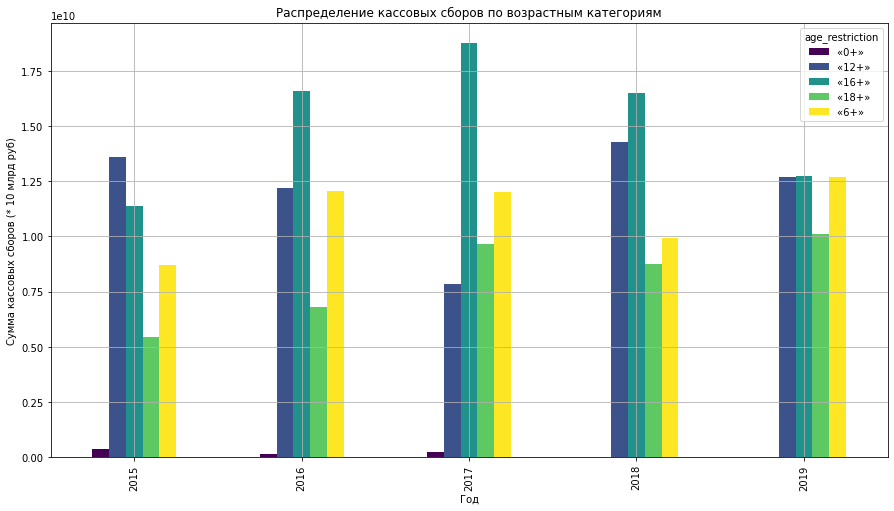

In [93]:
age_limit_pivot.plot(kind='bar', figsize=(15,8), colormap='viridis')
plt.grid(True)

plt.title('Распределение кассовых сборов по возрастным категориям', fontsize=12)
plt.ylabel('Сумма кассовых сборов (* 10 млрд руб)')
plt.xlabel('Год')
plt.show()

**Вывод**

Наибольшая сумма кассовых сборов характерна для категории «16+» - 75.96 млрд рублей. Далее идут сборы категории «12+» - 60.6 млрд рублей, «6+» - 55.4 млрд рублей, «18+» - 40,8 млрд рублей. Минимальные кассовые сборы у возрастной категории «0+» - 0,8 млрд рублей.

При этом стоит отметить, что наибольшее колиичество фильмов приходится на категорию «16+» - 802 фильма, далее на категорию «18+» - 791 фильм. На категории «12+» и «6+» приходится по 346 и 313 фильмов соответственно. Минимальное количество фильмов в категории «0+» - 90.

В каждой возрастной категории имеются фильмы-блокбастеры, влияющие на средние кассовые сборы. Вместе с тем, исходя из границ нормального распределения значений кассовых сборов по каждой возрастной категории можно сделать вывод, что в целом наибольшие кассовые сборы приносят фильмы категории "12+", затем фильмы категории "6+", далее категории "16+", минимальное количество кассовых сборов приносят фильмы с возрастными ограничениями "0+" и "18+".

В 2015 году наибольшая сумма кассовых сборов приходилась на возрастную категорию "12+" - 13,6 млрд рублей, с 2016 по 2018 год наибольшая сумма кассовых сборов приходилась на возрастную категорию "16+" - 16,6, 18,7, 16,5 млрд рублей соответственно. В 2019 году основная доля кассовых сборов приходится на возрастные категории "6+", "12+" и "16+". 

**Подведем итоги**

Значимые для анализа данные появляются с 2014 года. Вероятно, до 2014 года включительно данные не были внесены в полном объеме.

*Доля фильмов в кинопрокате от общего количества фильмов*

Доля фильмов в кинопрокате от общего количества фильмов имела тенденцию к росту с 2010 по 2015 год - с 10,7 до 65,9%%. В 2016 году доля фильмов в кинопрокате снизилась до 64,2%. Пик приходится на 2017 год - 70,6%. В 2018 году доля фильмов в кинопрокате резко снизилась до 53,2%, в 2019 году наблюдается рост доли до 56,9%.

*Динамика проката по годам*

Наблюдается рост сумм сборов в кинопрокате с 2015 года по 2018 год - с 39,5 млрд до 49,5 млрд рублей. Вероятно, это было связано с проведением в 2016 году в Российской Федерации Года российского кино и соответствующими мероприятиями, направленными на поддержку российского кинопроката.
В 2019 году сборы снизились на 1,2 млрд рублей в сравнении с предыдущим годом и составили 48,3 млрд рублей.

*Средняя и медианная сумма сборов для каждого года*

Средние показатели сборов в кинотеатрах имели тенденцию к росту с 2015 по 2017 год - с 85,1 млн руб до 136,3 млн руб. В 2018 году средний показатель сборов снизился и составил 104,6 млн руб., в 2019 году средний показатель продолжил снижаться и составил 91,3 млн рублей.

Медианный показатель сборов в кинотеатрах в 2015 году составлял 4,9 млн руб, в 2016 году произошло снижение до 3,8 млн руб. Максимальный медианный показатель сборов в кинотеатрах наблюдается в 2017 году - 9,9 млн руб., с 2018 медианный показатель снижается - в 2018 году составил 8,75 млн рублей, в 2019 году - 4,6 млн руб.

*Возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.)*

Наибольшая сумма кассовых сборов характерна для категории «16+» - 75.96 млрд рублей. Далее идут сборы категории «12+» - 60.6 млрд рублей, «6+» - 55.4 млрд рублей, «18+» - 40,8 млрд рублей. Минимальные кассовые сборы у возрастной категории «0+» - 0,8 млрд рублей.

При этом стоит отметить, что наибольшее колиичество фильмов приходится на категорию «16+» - 802 фильма, далее на категорию «18+» - 791 фильм. На категории «12+» и «6+» приходится по 346 и 313 фильмов соответственно. Минимальное количество фильмов в категории «0+» - 90.

В каждой возрастной категории имеются фильмы-блокбастеры, влияющие на средние кассовые сборы. Вместе с тем, исходя из границ нормального распределения значений кассовых сборов по каждой возрастной категории можно сделать вывод, что в целом наибольшие кассовые сборы приносят фильмы категории "12+", затем фильмы категории "6+", далее категории "16+", минимальное количество кассовых сборов приносят фильмы с возрастными ограничениями "0+" и "18+".

В 2015 году наибольшая сумма кассовых сборов приходилась на возрастную категорию "12+" - 13,6 млрд рублей, с 2016 по 2018 год наибольшая сумма кассовых сборов приходилась на возрастную категорию "16+" - 16,6, 18,7, 16,5 млрд рублей соответственно. В 2019 году основная доля кассовых сборов приходится на возрастные категории "6+", "12+" и "16+".


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Правильно, что сделали отдельный датасет фильмов с господдержкой.</font>

In [94]:
# для целей анализа создадим датафрейм с фильмами с государственной поддержкой
gov_support_films = data.loc[data['total_support'] > 0]
# выведем информацию
gov_support_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1281 to 7477
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  324 non-null    object        
 1   pu_number              324 non-null    int64         
 2   show_start_date        324 non-null    datetime64[ns]
 3   type                   324 non-null    object        
 4   film_studio            324 non-null    object        
 5   production_country     324 non-null    object        
 6   director               324 non-null    object        
 7   producer               324 non-null    object        
 8   age_restriction        324 non-null    object        
 9   refundable_support     324 non-null    float64       
 10  nonrefundable_support  324 non-null    float64       
 11  budget                 324 non-null    float64       
 12  financing_source       324 non-null    object        
 13  r

Наблюдаются пропуски в столбцах ratings, genres, box_office. Для наиболее полного анализа проведем работу по ручному восстановлению данных на основании информации из Кинопоиска, за период с 2019 года отсутствующие значения могли быть восстановлены или актуализированы.

In [95]:
# выведем информацию о пропущенных значениях в столбце box_office
gov_support_films.loc[gov_support_films['box_office'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,total_support,support_proportion
2799,Золотая рыбка (2015),111018715,2015-10-29 12:00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.00,...,"41,998,984.00",Министерство культуры,6.30,драма,NaN,2015,драма,А.Галибин,"25,000,000.00",0.60
3336,Любовь и Сакс,111001217,2017-02-16 12:00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.00,...,"61,000,000.00",Министерство культуры,5.20,мелодрама,NaN,2017,мелодрама,А.Сурикова,"10,000,000.00",0.16
3710,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.00,...,"18,706,080.00",Министерство культуры,7.00,"мультфильм,приключения,детектив",NaN,2016,мультфильм,А.Романец,"11,520,000.00",0.62
5660,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.00,...,"44,600,000.00",Министерство культуры,7.20,"детский,комедия",NaN,2017,детский,Е.Соколов,"25,000,000.00",0.56
6475,Зима,111023518,2019-03-15 12:00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0.00,...,"39,700,000.00",Министерство культуры,5.20,"драма,криминал",NaN,2019,драма,С.Черников,"25,000,000.00",0.63
6708,Мальчик русский,111002619,2019-02-20 12:00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,неизвестен,«12+» - для детей старше 12 лет,0.00,...,"46,941,140.00",Министерство культуры,6.10,"драма,военный,история",NaN,2019,драма,А.Золотухин,"30,000,000.00",0.64
6967,Танец с саблями,111008619,2019-05-29 12:00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0.00,...,"61,571,449.00",Министерство культуры,5.80,"драма,история,биография",NaN,2019,драма,Ю.Разыков,"40,000,000.00",0.65
7008,Куратор,111010019,2019-06-13 12:00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс",Россия - Грузия,П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0.00,...,"60,668,576.00",Министерство культуры,4.90,"драма,криминал,детектив",NaN,2019,драма,П.Левченко,"25,000,000.00",0.41
7179,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.00,...,"33,000,000.00",Министерство культуры,8.00,семейный,NaN,2019,семейный,А.Попова,"3,000,000.00",0.09
7228,На Луне,111015519,2019-11-01 12:00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.00,...,"57,876,000.00",Министерство культуры,6.60,"приключения,триллер",NaN,2019,приключения,Е.Михалков-Кончаловский,"35,000,000.00",0.60


Заполним пропущенные значения там, где это возможно, данными из Кинопоиска. Вместе с тем, в большинстве случаев сборы указываются в долларах США, переведем в рубли, умножив на среднегодовой курс 2019 года для фильмов, получивших прокатное удостоверение в 2019 году, для фильма "(Не)идеальный мужчина", вышедшего в прокат уже в 1 квартале 2020 года используем средний курс на 1 квартал 2020 года.

Данные Центрального банка РФ:

https://cbr.ru/vfs/statistics/credit_statistics/ex_rate_ind/03-ex_rate_19.xlsx 2019 - 64,73 руб.

https://cbr.ru/vfs/statistics/credit_statistics/ex_rate_ind/03-ex_rate_20.xlsx 2020 1 кв = 66,09 руб.

In [96]:
gov_support_films.loc[6475, 'box_office'] = (11759*64.73) 
gov_support_films.loc[6708, 'box_office'] = (15429*64.73) 
gov_support_films.loc[6967, 'box_office'] = (22000*64.73) 
gov_support_films.loc[7008, 'box_office'] = (2382*64.73) 
gov_support_films.loc[7228, 'box_office'] = (13955*64.73) 
gov_support_films.loc[7343, 'box_office'] = (14985*64.73) 
gov_support_films.loc[7473, 'box_office'] = (16653687*64.73) 
gov_support_films.loc[7477, 'box_office'] = (8613317*66.09) 

Устранено 8 пропусков из 14. Для 6 фильмов информации о сборах нет, поскольку они являются либо короткометражным мультфильмом, либо документальным фильмом, либо вышли в цифровом релизе или на ТВ.

In [97]:
# выведем информацию о пропущенных значениях в столбце ratings
gov_support_films.loc[gov_support_films['ratings'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,total_support,support_proportion
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,NaN,NaN,"28,140.00",2014,nan,А.Якимчук,"26,000,000.00",0.70
2145,Главный,111003415,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,...,"40,000,000.00",Министерство культуры,NaN,"фантастика,боевик,комедия","334,750.00",2015,фантастика,Ю.Кара,"10,000,000.00",0.25
2149,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.00,...,"37,371,262.00",Министерство культуры,NaN,NaN,"19,820.00",2015,nan,К.Сухарьков,"25,000,000.00",0.67
2450,ПРАЗДНИК НЕПОСЛУШАНИЯ,111016215,2015-08-28 12:00:00,Художественный,"АНО ""Творческая студия ""Стелла""",Россия,"В.Харченко, А.Волков",Ф.Попов,«6+» - для детей старше 6 лет,0.00,...,"49,071,428.00",Министерство культуры,NaN,NaN,"182,510.00",2015,nan,В.Харченко,"34,000,000.00",0.69
2816,Иерей-Сан. Исповедь самурая. ПОСТАНОВЛЕНИЕМ СУ...,111019315,2015-11-17 12:00:00,Художественный,"ООО ""Студия Ортодокс""",Россия,Е.Баранов,"Л.Калинский, И.Охлобыстин, Г.Палагаев",«16+» - для детей старше 16 лет,"25,000,000.00",...,"74,071,918.00",Фонд кино,NaN,NaN,"11,011,814.30",2015,nan,Е.Баранов,"40,000,000.00",0.54
2998,Жили-были мы,111008716,2016-05-12 12:00:00,Художественный,"ООО ""Русские Золотые Серии""",Россия,А.Чернакова,"А.Чернакова, Ю.Сапронов",«0+» - для любой зрительской аудитории,0.00,...,"69,883,049.00",Министерство культуры,NaN,NaN,"658,870.00",2016,nan,А.Чернакова,"35,000,000.00",0.50
3060,Первая Мировая война WWI,111000716,2016-01-25 12:00:00,Художественный,"ООО ""Корнер Ворк""",Россия,И.Угольников,И.Угольников,«12+» - для детей старше 12 лет,0.00,...,"45,538,655.00",Фонд кино,NaN,NaN,"87,810.00",2016,nan,И.Угольников,"30,000,000.00",0.66
3138,Я умею вязать,111019615,2015-11-27 12:00:00,Художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.00,...,"14,462,464.00",Министерство культуры,NaN,драма,"801,370.00",2015,драма,Н.Степанова при участии С.Иванова,"4,700,000.00",0.32
3384,О любви (2017),111018816,2016-12-28 12:00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,"20,000,000.00",...,"70,086,439.00","Министерство культуры, Фонд кино",NaN,NaN,"11,332,412.00",2016,nan,В.Бортко,"55,000,000.00",0.78
3388,Как Витька Чеснок вёз Лёху штыря в дом инвалидов,111005017,2017-06-30 12:00:00,Художественный,"ООО ""Продюсерский центр ""ВГИК - Дебют""",Россия,А.Хант,"В.Мадышев, Ф.Попов",«18+» - запрещено для детей,0.00,...,"38,500,000.00",Министерство культуры,NaN,NaN,"5,503,875.00",2017,nan,А.Хант,"25,000,000.00",0.65


In [98]:
# заполним пропущенные значения данными из Кинопоиска
gov_support_films.loc[1448, 'ratings'] = 3.6
gov_support_films.loc[2145, 'ratings'] = 5.8
gov_support_films.loc[2816, 'ratings'] = 6.3
gov_support_films.loc[2998, 'ratings'] = 5.4
gov_support_films.loc[3384, 'ratings'] = 6.2
gov_support_films.loc[3388, 'ratings'] = 7.2
gov_support_films.loc[3613, 'ratings'] = 5.8
gov_support_films.loc[5707, 'ratings'] = 6.9
gov_support_films.loc[6244, 'ratings'] = 6.4
gov_support_films.loc[6909, 'ratings'] = 7.1
gov_support_films.loc[7208, 'ratings'] = 6.9
gov_support_films.loc[7343, 'ratings'] = 5.2

Заполнено 12 пропусков из 18, у 6 фильмов отсутствует рейтинг на Кинопоиске, вероятно, не набрано необходимое количество оценок зрителей.

In [99]:
# выведем информацию о пропущенных значениях в столбце genres
gov_support_films.loc[gov_support_films['genres'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,total_support,support_proportion
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"37,142,857.00",Министерство культуры,3.60,NaN,"28,140.00",2014,nan,А.Якимчук,"26,000,000.00",0.70
2149,РЕВЕРБЕРАЦИЯ,111003515,2015-03-30 12:00:00,Художественный,"ООО ""Артлайт""",Россия,К.Сухарьков,А.Новиков,«18+» - запрещено для детей,0.00,...,"37,371,262.00",Министерство культуры,NaN,NaN,"19,820.00",2015,nan,К.Сухарьков,"25,000,000.00",0.67
2450,ПРАЗДНИК НЕПОСЛУШАНИЯ,111016215,2015-08-28 12:00:00,Художественный,"АНО ""Творческая студия ""Стелла""",Россия,"В.Харченко, А.Волков",Ф.Попов,«6+» - для детей старше 6 лет,0.00,...,"49,071,428.00",Министерство культуры,NaN,NaN,"182,510.00",2015,nan,В.Харченко,"34,000,000.00",0.69
2816,Иерей-Сан. Исповедь самурая. ПОСТАНОВЛЕНИЕМ СУ...,111019315,2015-11-17 12:00:00,Художественный,"ООО ""Студия Ортодокс""",Россия,Е.Баранов,"Л.Калинский, И.Охлобыстин, Г.Палагаев",«16+» - для детей старше 16 лет,"25,000,000.00",...,"74,071,918.00",Фонд кино,6.30,NaN,"11,011,814.30",2015,nan,Е.Баранов,"40,000,000.00",0.54
2998,Жили-были мы,111008716,2016-05-12 12:00:00,Художественный,"ООО ""Русские Золотые Серии""",Россия,А.Чернакова,"А.Чернакова, Ю.Сапронов",«0+» - для любой зрительской аудитории,0.00,...,"69,883,049.00",Министерство культуры,5.40,NaN,"658,870.00",2016,nan,А.Чернакова,"35,000,000.00",0.50
3060,Первая Мировая война WWI,111000716,2016-01-25 12:00:00,Художественный,"ООО ""Корнер Ворк""",Россия,И.Угольников,И.Угольников,«12+» - для детей старше 12 лет,0.00,...,"45,538,655.00",Фонд кино,NaN,NaN,"87,810.00",2016,nan,И.Угольников,"30,000,000.00",0.66
3384,О любви (2017),111018816,2016-12-28 12:00:00,Художественный,"ООО ""СТУДИЯ ""2-Б-2"" ИНТЕРТЭЙНМЕНТ""",Россия,В.Бортко,Н.Бортко,«16+» - для детей старше 16 лет,"20,000,000.00",...,"70,086,439.00","Министерство культуры, Фонд кино",6.20,NaN,"11,332,412.00",2016,nan,В.Бортко,"55,000,000.00",0.78
3388,Как Витька Чеснок вёз Лёху штыря в дом инвалидов,111005017,2017-06-30 12:00:00,Художественный,"ООО ""Продюсерский центр ""ВГИК - Дебют""",Россия,А.Хант,"В.Мадышев, Ф.Попов",«18+» - запрещено для детей,0.00,...,"38,500,000.00",Министерство культуры,7.20,NaN,"5,503,875.00",2017,nan,А.Хант,"25,000,000.00",0.65
3613,Три сестры,111004417,2017-06-09 12:00:00,Художественный,"ООО ""РТВ"", АО ""ТПО ""Киностудия им. М.Горького""...",Россия,Ю.Грымов,"Ю.Грымов, С.Зернов",«16+» - для детей старше 16 лет,0.00,...,"37,878,787.00",Министерство культуры,5.80,NaN,"1,067,649.00",2017,nan,Ю.Грымов,"25,000,000.00",0.66
3654,О чем молчат французы,111012016,2016-07-22 12:00:00,Художественный,"ООО ""Киностудия Арго""",Россия,В.Шевельков,"В.Шевельков, М.Бебенина",«12+» - для детей старше 12 лет,0.00,...,"46,153,887.00",Министерство культуры,NaN,NaN,"95,650.00",2016,nan,В.Шевельков,"30,000,000.00",0.65


In [100]:
# заполним пропущенные значения данными из Кинопоиска
gov_support_films.loc[1448, 'genres'] = 'комедия'
gov_support_films.loc[2149, 'genres'] = 'комедия'
gov_support_films.loc[2450, 'genres'] = 'комедия'
gov_support_films.loc[2816, 'genres'] = 'боевик, драма'
gov_support_films.loc[2998, 'genres'] = 'семейный'
gov_support_films.loc[3060, 'genres'] = 'военный'
gov_support_films.loc[3384, 'genres'] = 'мелодрама'
gov_support_films.loc[3388, 'genres'] = 'драма, комедия, криминал'
gov_support_films.loc[3613, 'genres'] = 'драма'
gov_support_films.loc[3654, 'genres'] = 'триллер, история, комедия, детектив, мелодрама'
gov_support_films.loc[5707, 'genres'] = 'спорт, мюзикл, мелодрама'
gov_support_films.loc[6244, 'genres'] = 'драма, спорт'
gov_support_films.loc[6322, 'genres'] = 'мультфильм'
gov_support_films.loc[6909, 'genres'] = 'драма, военный, история'
gov_support_films.loc[7208, 'genres'] = 'биография, спорт, история'
gov_support_films.loc[7343, 'genres'] = 'мелодрама, драма'

# повторно применим функцию main для указания основного жанра в столбце main_genre
def main(value, new):
    for row in gov_support_films:
        gov_support_films[new] = gov_support_films[value].astype(str).str.split(',').str[0]
        gov_support_films[new] = gov_support_films[new].str.strip()

main('genres', 'main_genre')

In [102]:
# повторно выведем информацию о датафрейме
gov_support_films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1281 to 7477
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  324 non-null    object        
 1   pu_number              324 non-null    int64         
 2   show_start_date        324 non-null    datetime64[ns]
 3   type                   324 non-null    object        
 4   film_studio            324 non-null    object        
 5   production_country     324 non-null    object        
 6   director               324 non-null    object        
 7   producer               324 non-null    object        
 8   age_restriction        324 non-null    object        
 9   refundable_support     324 non-null    float64       
 10  nonrefundable_support  324 non-null    float64       
 11  budget                 324 non-null    float64       
 12  financing_source       324 non-null    object        
 13  r

Имеется 6 пропусков в столбце ratings, 6 пропусков в столбце box_office. Указанные пропуски соответствуют реальному отсутствию информации.

In [103]:
# добавим столбец profit с величиной дохода (убытка) по результатам проката
gov_support_films['profit'] = gov_support_films['box_office'] - gov_support_films['budget']

**Приступим к анализу**

In [104]:
print(gov_support_films['total_support'].sum())

19672688312.0


Всего в рассматриваемом периоде выделено на поддержку отечественного кинематографа 19 672 688 312.0 рублей.

In [105]:
# построим сводную таблицу support, где по годам будут указаны суммы государственной поддержки
support = gov_support_films.pivot_table(index = 'show_start_year', values = 'total_support', aggfunc = 'sum').reset_index()
support

,show_start_year,total_support
0,2013,"134,347,945.00"
1,2014,"549,002,299.00"
2,2015,"3,597,241,459.00"
3,2016,"4,227,155,482.00"
4,2017,"3,143,971,662.00"
5,2018,"3,296,969,465.00"
6,2019,"4,724,000,000.00"


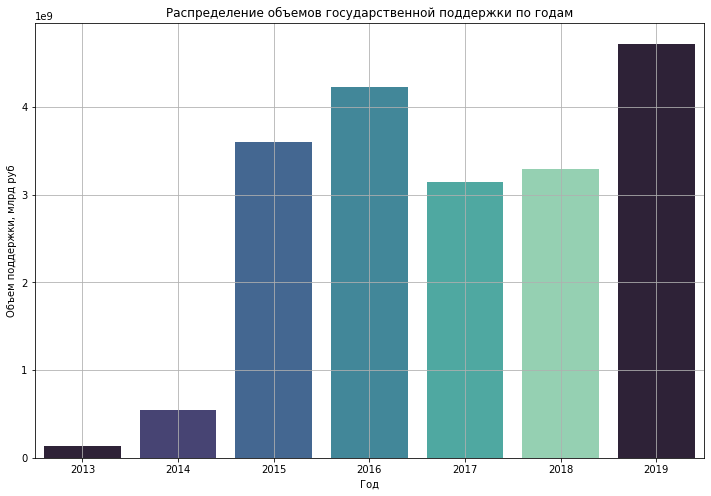

In [106]:
# визуализируем данные, построив график
fig = plt.figure(figsize=(12,8))

sns.barplot(x='show_start_year', y='total_support', data=support, palette=sns.color_palette("mako"))

plt.grid(True)

plt.title('Распределение объемов государственной поддержки по годам', fontsize=12)
plt.ylabel('Объем поддержки, млрд руб')
plt.xlabel('Год')
plt.show()

Вероятно, до 2014 года включительно данные о размере государственной поддержке не были внесены в полном объеме. 

В 2015 году общий объем государственной поддержки составил 3,6 млрд рублей, в 2016 году показатель вырос до 4,23 млрд рублей. В 2017 и 2018 годах наблюдается снижение показателей - 3,14 и 3,3 млрд соответственно. Максимальный объем государственной поддержки приходится на 2019 год - 4,72 млрд рублей.

Дальнейший анализ считаю целесообразным осуществлять в разрезе двух источников финансирования - Министерства культуры РФ и Фонда кино. 

Фонд кино финансирует фильмы для массовой аудитории, в Минкульт обращаются за поддержкой дебютов, авторского, документального и детского кино.

https://www.kinopoisk.ru/media/article/4005463/

In [107]:
# построим сводную таблицу source, где будут указаны суммы государственной поддержки и прибыль в зависимости от источника
source = gov_support_films.pivot_table(index = 'financing_source', aggfunc = {'profit':['count', 'sum'], 'total_support':'sum'}).reset_index()

source

financing_source profit                       total_support
                                     count               sum               sum
0             Министерство культуры    157 -5,911,877,885.20  4,830,661,000.00
1  Министерство культуры, Фонд кино     21 -1,831,205,206.84  1,162,431,354.00
2                         Фонд кино    140  6,858,255,275.16 13,679,595,958.00

Фильмы, где источником финансирования выступило Министерство культуры, убыточны по результатам кинопроката. Общий убыток составил 5,91 млрд рублей. При этом только объем государственного финансирования составил 4,83 млрд рублей.

Фильмы, где источником финансирования выступил Фонд кино, в целом принесли прибыль по результатам кинопроката. Общая прибыль составила 6,86 млрд рублей. Объем государственного финансирования составил 13,68 млрд рублей.

В 21 фильме источником финансирования указан "Министерство культуры, Фонд кино". Убыток по этим фильмам составил 1,83 млрд рублей, размер государственной поддержки - 1,16 млрд рублей.

Выведем информацию о данных фильмах:

In [108]:
gov_support_films.query('financing_source == "Министерство культуры, Фонд кино"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,total_support,support_proportion,profit
1870,Две женщины,111013714,2014-10-02 12:00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия, Франция, Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,...,"Министерство культуры, Фонд кино",6.70,драма,"4,731,239.50",2014,драма,В.Глаголева,"46,502,299.00",0.54,"-81,478,827.50"
2091,Батальонъ,111000715,2015-01-29 12:00:00,Художественный,"ООО ""Корнер Ворк"", ООО ""Арт Пикчерс Студия""",Россия,Д.Месхиев,И.Угольников,«12+» - для детей старше 12 лет,0.00,...,"Министерство культуры, Фонд кино",7.10,"драма,военный,история","451,812,221.70",2015,драма,Д.Месхиев,"56,579,055.00",0.13,"15,375,045.70"
2107,ОХРАНА,111001115,2015-02-11 12:00:00,Художественный,"ООО ""Амкарт""",Россия,А.Прошкин,Д.Пиркулов,«16+» - для детей старше 16 лет,0.00,...,"Министерство культуры, Фонд кино",5.00,"драма,комедия","310,738.00",2015,драма,А.Прошкин,"45,000,000.00",0.66,"-68,179,868.00"
2363,Левиафан.,111009714,2014-09-11 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Звягинцев,"А.Роднянский, С.Мелькумов",«18+» - запрещено для детей,0.00,...,"Министерство культуры, Фонд кино",6.90,"драма,криминал","88,120,041.10",2014,драма,А.Звягинцев,"90,000,000.00",0.34,"-179,168,850.90"
2534,72 часа,111011815,2015-07-15 12:00:00,Художественный,"ООО ""Продюсерская компания Николая Расторгуева""",Россия,К.Ангелина,"И.Николенко, Н.Расторгуев",«12+» - для детей старше 12 лет,"10,000,000.00",...,"Министерство культуры, Фонд кино",7.00,"военный,драма","10,355,541.11",2015,военный,К.Ангелина,"37,000,000.00",0.66,"-45,373,882.89"
2536,ВСТАВАЙ И БЕЙСЯ,111008615,2015-05-05 12:00:00,Художественный,"ООО ""ЛИГА ПРОДАКШН""","Россия, Италия",Стефано Лоренци,"Жанфранко Пиччоли, Надежда Горшкова, Катерина ...",«18+» - запрещено для детей,0.00,...,"Министерство культуры, Фонд кино",6.40,драма,"144,040.00",2015,драма,Стефано Лоренци,"60,000,000.00",0.43,"-139,213,171.00"
2537,Наследники (2015),111018515,2015-10-22 12:00:00,Художественный,"Культурный фонд ""Кино-телекомпания ""Православн...",Россия,В.Хотиненко,"С.Кравец, В.Хотиненко",«16+» - для детей старше 16 лет,"7,153,119.00",...,"Министерство культуры, Фонд кино",6.10,"мюзикл,фэнтези,комедия","194,780.00",2015,мюзикл,В.Хотиненко,"35,153,119.00",0.70,"-50,023,961.00"
2768,Коробка.,111013215,2015-08-21 12:00:00,Художественный,"ООО ""Телесто-фильм""",Россия,Э.Бордуков,"Е.Гликман, М.Дегтярь, Я.Живов",«12+» - для детей старше 12 лет,"10,000,000.00",...,"Министерство культуры, Фонд кино",6.90,"драма,спорт,комедия","9,977,812.50",2015,драма,Э.Бордуков,"34,450,000.00",0.59,"-48,100,638.50"
2802,Битва с экстрасенсами,111011315,2015-07-20 12:00:00,Художественный,"ООО ""КИНОДАНЦ"", ООО ""КИНОБАЙТ""",Россия,И.Кордзаия,Е.Мелентьев,«12+» - для детей старше 12 лет,0.00,...,"Министерство культуры, Фонд кино",5.40,"фэнтези,приключения","6,000.00",2015,фэнтези,И.Кордзаия,"25,900,000.00",0.43,"-59,554,746.00"
2939,Тэли и Толи,111005916,2016-03-30 12:00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн""",Россия,А.Амиров,"Н.Иванова, М.Ксинопуло",«12+» - для детей старше 12 лет,0.00,...,"Министерство культуры, Фонд кино",6.20,"комедия,мелодрама","1,301,350.50",2016,комедия,А.Амиров,"25,200,000.00",0.67,"-36,587,814.50"


Указанные фильмы соответствуют приоритетным темам Министерства культуры, и, вероятнее всего, были профинансированы Фондом кино по поручению Министерства культуры РФ. Будем рассматривать такие фильмы совместно с источником финансирования "Министерство культуры".

In [109]:
# создадим переменную для фильмов, финансируемых Министерством культуры, в тч с привлечением Фонда кино
minkult_support = gov_support_films.query('(financing_source == "Министерство культуры") or (financing_source == "Министерство культуры, Фонд кино")') 

In [110]:
# создадим переменную для фильмов, финансируемых Министерством культуры
fund_support = gov_support_films.query('financing_source == "Фонд кино"')

**Начнем анализ с фильмов, финансируемых Министерством культуры, в том числе с привлечением Фонда кино**

Сперва построим матрицу корреляции по столбцам с количественными значениями:

               total_support  budget  box_office  profit
total_support           1.00    0.54        0.16   -0.28
budget                  0.54    1.00        0.34   -0.49
box_office              0.16    0.34        1.00    0.65
profit                 -0.28   -0.49        0.65    1.00


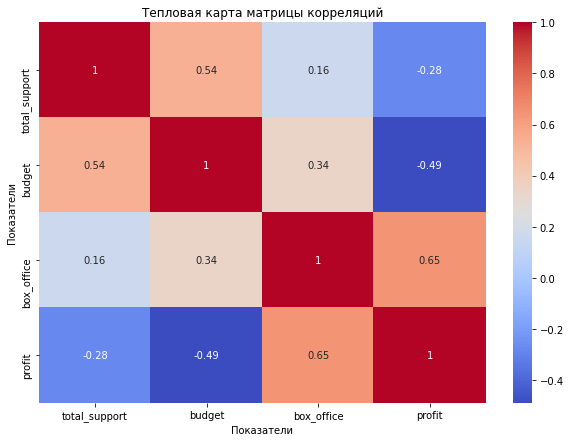

In [111]:
# создадим переменную с количественными столбцами
minkult_support_corr = minkult_support.loc[:,['total_support', 'budget', 'box_office', 'profit']]

# построим матрицу корреляции
corr_matrix = round(minkult_support_corr.corr(), 2)
print(corr_matrix)

# визуализируем матрицу корреляции в виде тепловой карты
plt.figure(figsize = (10, 7))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')

plt.title('Тепловая карта матрицы корреляций', fontsize=12)
plt.ylabel('Показатели')
plt.xlabel('Показатели')
plt.show()

Наблюдается сильная корреляция (0,65) между кассовыми сборами и размером прибыли. Достаточно слабая взаимосвязь характерна для кассовых сборов и государственной поддержки (0,16), кассовых сборов и бюджета фильма (0,34).

Корреляция между бюджетом фильма и государственной поддержкой составляет 0,54. 

Выявлена обратная зависимость между бюджетом фильма (-0,49), объемом государственной поддержки (-0,28) и размером прибыли.

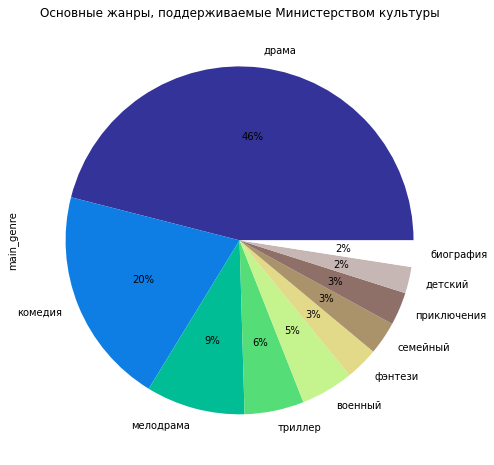

In [112]:
# построим диаграмму с основными жанрами фильмов
(minkult_support['main_genre'].value_counts().head(10)
                              .plot(y='count', autopct='%1.0f%%', kind='pie', figsize=(15,8), colormap='terrain')
)
plt.title('Основные жанры, поддерживаемые Министерством культуры', fontsize=12)
plt.show()

Основными жанрами фильмов, поддерживаемых Министерством культуры, являются драма, комедия, мелодрама. 

In [113]:
# построим сводную таблицу minkult_profit, где будут указаны размеры прибыли по жанрам
minkult_profit = minkult_support.pivot_table(index = 'main_genre', values = 'profit', aggfunc = 'sum')

minkult_profit.sort_values(by=['profit'], ascending=False).reset_index() 

,main_genre,profit
0,боевик,"118,185,976.74"
1,комедия,"102,403,093.56"
2,реальное ТВ,"-47,278,896.57"
3,мультфильм,"-81,760,506.40"
4,ужасы,"-124,140,299.53"
5,детский,"-136,284,352.00"
6,военный,"-148,333,545.20"
7,история,"-156,025,800.49"
8,биография,"-156,514,823.81"
9,семейный,"-165,188,855.85"


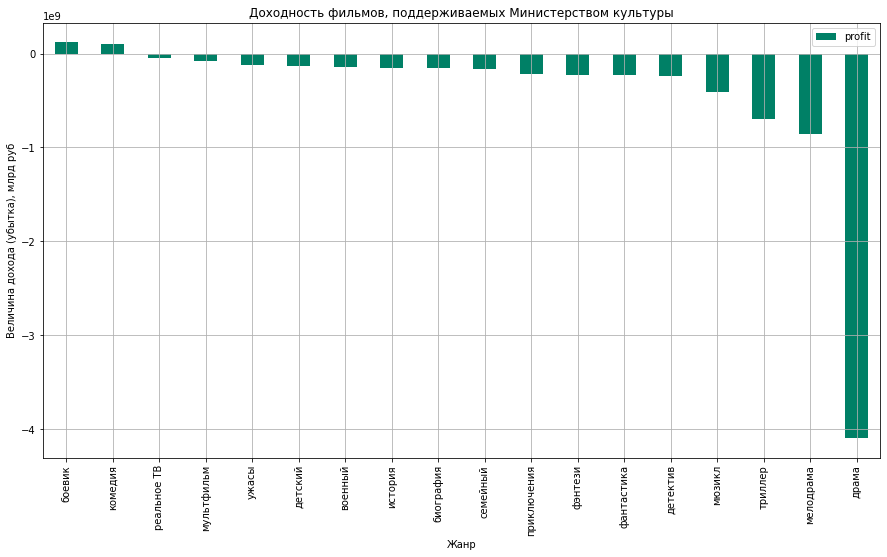

In [114]:
# визуализируем данные, построив график
minkult_profit.sort_values(by=['profit'], ascending=False).plot(kind='bar', figsize=(15,8), colormap='summer')

plt.grid(True)

plt.title('Доходность фильмов, поддерживаемых Министерством культуры', fontsize=12)
plt.ylabel('Величина дохода (убытка), млрд руб')
plt.xlabel('Жанр')
plt.show()

Из представленного графика видно, что прибыль принесли только 2 жанра - боевик и комедия. Остальные жанры убыточны. Наиболее убыточен жанр "драма", но стоит отметить, что фильмы этого жанра в основном поддерживаются Министерством культуры.

Вместе с тем финансовый успех в прокате не является целью поддержки фильмов Министерством культуры.

Проанализируем рейтинги фильмов, снятых с поддержкой Министерства культуры.

In [115]:
# построим сводную таблицу minkult_genres, где будут указаны медианные рейтинги по жанрам
minkult_genres = minkult_support.pivot_table(index = 'main_genre', values = 'ratings', aggfunc = 'median') 
# построим сводную таблицу data_genres, где будут указаны медианные рейтинги фильмов без гос поддержки по жанрам 
data_genres = data.loc[(data['total_support'].isna() == True) & (data['production_country'].str.contains('Россия'))] \
                  .pivot_table(index = 'main_genre', values = 'ratings', aggfunc = 'median') 
# объединим таблицы
minkult_genres_merge = minkult_genres.merge(data_genres, on='main_genre', how='left')
minkult_genres_merge.columns = ['ratings_with_support', 'ratings_without_support']
# добавим столбец с разницей
minkult_genres_merge['difference'] = minkult_genres_merge['ratings_with_support'] - minkult_genres_merge['ratings_without_support']

minkult_genres_merge.sort_values(by=['difference'], ascending=False)

,ratings_with_support,ratings_without_support,difference
main_genre,,,
фэнтези,7.10,6.10,1.00
детектив,7.50,6.50,1.00
мультфильм,7.00,6.05,0.95
боевик,6.80,6.35,0.45
биография,6.90,6.60,0.30
военный,6.55,6.45,0.10
комедия,5.80,5.70,0.10
детский,7.25,7.20,0.05
мелодрама,6.20,6.20,0.00


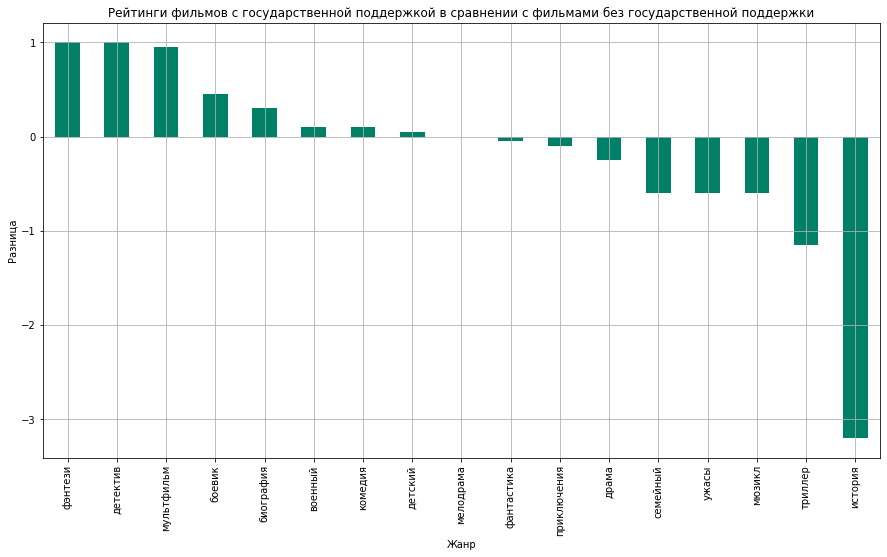

In [116]:
# визуализируем данные, построив график
minkult_genres_merge['difference'].loc[minkult_genres_merge['difference'].isna() == False] \
                                  .sort_values(ascending=False).plot(kind='bar', figsize=(15,8), colormap='summer')
plt.grid(True)

plt.title('Рейтинги фильмов с государственной поддержкой в сравнении с фильмами без государственной поддержки', fontsize=12)
plt.ylabel('Разница')
plt.xlabel('Жанр')
plt.show()

В сравнении с фильмами без государственной поддержки более высокой оценкой зрителей характеризуются жанры "фэнтези", "детектив", "мультфильм", "боевик", "биография", "военный", "комедия", "детский". 

Наибольшая отрицательная разница в рейтинге (более, чем 1 балл) в сравнении с фильмами без государственной поддержки выявлена в жанрах "история", "триллер".

In [117]:
# выведем фильмы с наибольшей отрицательной разницей
minkult_support.query('main_genre == ["история", "триллер"]')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,total_support,support_proportion,profit
2488,Последний вагон. Весна,111004115,2015-04-15 12:00:00,Художественный,"ООО ""ТАН Фильм""",Россия,А.Калинкин,"Д.Ефремов, В.Пономаренко",«18+» - запрещено для детей,0.00,...,Министерство культуры,5.10,триллер,"61,193.00",2015,триллер,А.Калинкин,"25,000,000.00",0.70,"-35,698,867.00"
2601,Вакантна жизнь шеф-повара,111011515,2015-07-10 12:00:00,Художественный,"ООО ""Продюсерский центр ""ВГИК-Дебют""",Россия,Р.Ильясов,"В.Малышев, Ф.Попов",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,6.30,"триллер,драма,фантастика","1,572,434.50",2015,триллер,Р.Ильясов,"20,000,000.00",0.70,"-26,998,994.50"
3246,Дама Пик,111012416,2016-08-05 12:00:00,Художественный,"ООО ""Мастерская Павла Лунгина"". ООО ""Арт Пикче...",Россия,П.Лунгин,"П.Лунгин, Ф.Бондарчук, Д.Рудовский, Е.Панфилов",«16+» - для детей старше 16 лет,"17,000,000.00",...,"Министерство культуры, Фонд кино",6.00,триллер,"30,393,100.72",2016,триллер,П.Лунгин,"150,000,000.00",0.66,"-195,878,432.28"
3654,О чем молчат французы,111012016,2016-07-22 12:00:00,Художественный,"ООО ""Киностудия Арго""",Россия,В.Шевельков,"В.Шевельков, М.Бебенина",«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,NaN,"триллер, история, комедия, детектив, мелодрама","95,650.00",2016,триллер,В.Шевельков,"30,000,000.00",0.65,"-46,058,237.00"
3683,Птица .,111011716,2016-07-15 12:00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,К.Баскакова,Э.Пичугин,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,5.40,"триллер,драма,мелодрама","607,588.00",2016,триллер,К.Баскакова,"25,000,000.00",0.62,"-39,993,212.00"
5963,Подвал,111009118,2018-11-01 12:00:00,Художественный,"ООО ""Кинокомпания ""Гейт"", Furia Film, 8Heads P...",Россия-Словакия-Чехия,И.Волошин,"Л.Филусова, Ж.Тедеева-Калинина, А.Воронкова, А...",«18+» - запрещено для детей,0.00,...,Министерство культуры,6.20,"триллер,криминал","288,019.50",2018,триллер,И.Волошин,"30,000,000.00",0.27,"-111,524,367.50"
6156,Странники терпенья,111015518,2018-10-18 12:00:00,Художественный,"ООО ""Кинокомпания ""Спутник""",Россия,В.Алеников,"ООО ""Кинокомпания ""Спутник"", ООО ""Киноспутник""",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,5.50,"триллер,драма","238,858.00",2018,триллер,В.Алеников,"30,000,000.00",0.43,"-70,066,142.00"
6606,Пилигрим,111000119,2019-02-14 12:00:00,Художественный,"ООО ""Чайка Синема""",Россия,А.Баршак,"М.Гуцериев, Е.Север, Т.Стацман",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,5.30,триллер,"4,293,649.51",2019,триллер,А.Баршак,"35,000,000.00",0.30,"-110,706,350.49"
6861,На Париж,111006819,2019-05-02 12:00:00,Художественный,"ООО ""БЛИЦ ФИЛЬМ""",Россия,С.Саркисов,"С.Саркисов, А.Жижневский, Р.Юсипов, В.Колесник",«18+» - запрещено для детей,0.00,...,Министерство культуры,3.20,"история,приключения","9,197,107.51",2019,история,С.Саркисов,"40,000,000.00",0.24,"-156,025,800.49"
7083,Конец сезона,111011719,2019-08-01 12:00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,К.Худяков,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,5.40,"триллер,мелодрама","596,072.00",2019,триллер,К.Худяков,"40,000,000.00",0.66,"-59,554,304.00"


In [118]:
# выведем главных режиссеров таких фильмов
minkult_support.query('main_genre == ["история", "триллер"]').value_counts(subset='main_director')

main_director
А.Баршак       1
А.Калинкин     1
В.Алеников     1
В.Шевельков    1
И.Волошин      1
К.Баскакова    1
К.Худяков      1
П.Лунгин       1
Р.Ильясов      1
С.Саркисов     1
dtype: int64

Фильмы с наиболее низким рейтингом в сравнении с фильмами без государственной поддержки сняты следующими режиссерами:
А.Баршак, А.Калинкин, В.Алеников, В.Шевельков, И.Волкова, И.Волошин, К.Баскакова, К.Худяков, П.Лунгин, Р.Ильясов, С.Саркисов. В будущем целесообразно более внимательно относиться к заявкам, представляемых на фильмы с участием этих режиссеров.

**Проведем анализ фильмов, финансируемых Фондом кино**

Сперва построим матрицу корреляции по столбцам с количественными значениями:

               total_support  budget  box_office  profit
total_support           1.00    0.71        0.44    0.05
budget                  0.71    1.00        0.31   -0.25
box_office              0.44    0.31        1.00    0.84
profit                  0.05   -0.25        0.84    1.00


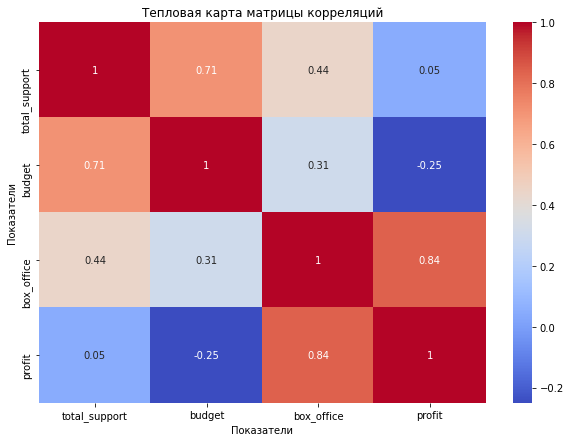

In [119]:
# создадим переменную с количественными столбцами
fund_support_corr = fund_support.loc[:,['total_support', 'budget', 'box_office', 'profit']]

# построим матрицу корреляции
corr_matrix = round(fund_support_corr.corr(), 2)
print(corr_matrix)

# визуализируем матрицу корреляции в виде тепловой карты
plt.figure(figsize = (10, 7))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')

plt.title('Тепловая карта матрицы корреляций', fontsize=12)
plt.ylabel('Показатели')
plt.xlabel('Показатели')
plt.show()

Наблюдается сильная корреляция (0,84) между кассовыми сборами и размером прибыли. Достаточно слабая взаимосвязь характерна для кассовых сборов и государственной поддержки (0,44), кассовых сборов и бюджета фильма (0,31).

Корреляция между бюджетом фильма и государственной поддержкой составляет 0,71, взаимосвязь существенная.

Выявлена слабая обратная зависимость между бюджетом фильма (-0,25) и размером прибыли. Размер государственной поддержки на прибыль практически не влияет.

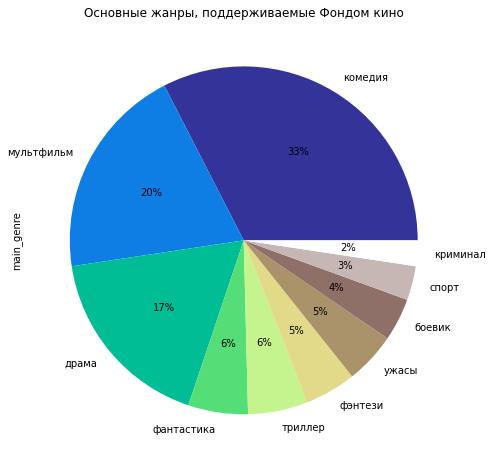

In [120]:
# построим диаграмму с основными жанрами фильмов
(fund_support['main_genre'].value_counts().head(10)
                           .plot(y='count', autopct='%1.0f%%', kind='pie', figsize=(15,8), colormap='terrain')
)
plt.title('Основные жанры, поддерживаемые Фондом кино', fontsize=12)
plt.show()

Основными жанрами фильмов, поддерживаемых Фондом кино, являются комедия, мультфильм, драма. 

In [121]:
# построим сводную таблицу fund_profit, где будут указаны размеры прибыли по жанрам
fund_profit = fund_support.pivot_table(index = 'main_genre', values = 'profit', aggfunc = 'sum')

fund_profit.sort_values(by=['profit'], ascending=False).reset_index() 

,main_genre,profit
0,комедия,"6,624,726,802.36"
1,спорт,"3,554,445,998.33"
2,драма,"2,320,796,286.52"
3,фантастика,"449,080,398.24"
4,ужасы,"270,385,863.88"
5,семейный,"76,589,639.50"
6,триллер,"-55,090,080.09"
7,мюзикл,"-57,295,415.34"
8,мелодрама,"-62,345,120.80"
9,военный,"-165,353,653.00"


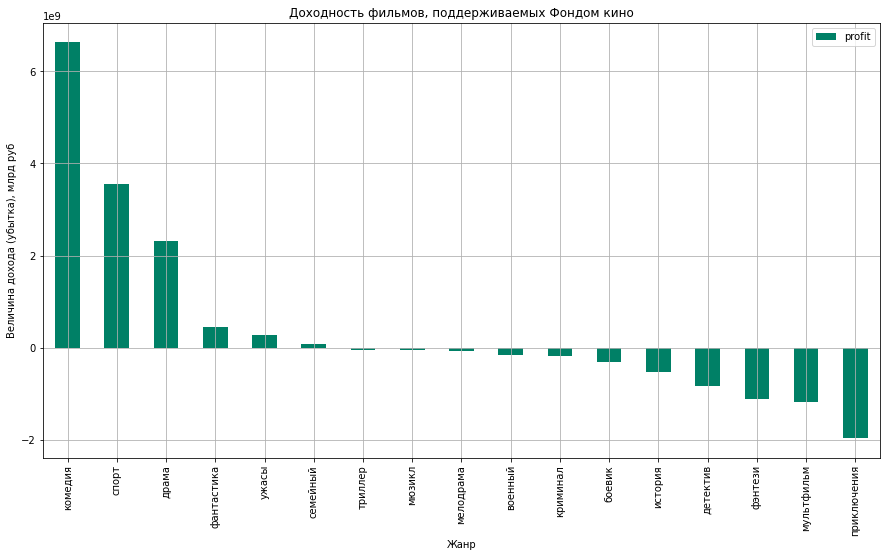

In [122]:
# визуализируем данные, построив график
fund_profit.sort_values(by=['profit'], ascending=False).plot(kind='bar', figsize=(15,8), colormap='summer')

plt.grid(True)

plt.title('Доходность фильмов, поддерживаемых Фондом кино', fontsize=12)
plt.ylabel('Величина дохода (убытка), млрд руб')
plt.xlabel('Жанр')
plt.show()

Наиболее успешными в кинопрокате стали следующие жанры фильмов: "комедия", "спорт", "драма". Наименее успешны в прокате фильмы с жанром "фэнтези", "мультфильм", "приключения".

Узнаем, фильмы каких режиссеров были наиболее успешными в прокате:

In [123]:
fund_support.sort_values(by=['profit'], ascending=False).head(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,total_support,support_proportion,profit
7455,Холоп,111021719,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00",...,Фонд кино,6.80,комедия,"3,073,568,690.79",2019,комедия,К.Шипенко,"60,000,000.00",0.38,"2,913,568,690.79"
5652,Движение вверх,111011817,2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,0.00,...,Фонд кино,7.50,"спорт,драма","2,779,686,144.00",2017,спорт,А.Мегердичев,"400,000,000.00",0.68,"2,189,493,953.00"
6548,Т-34,111024918,2018-12-21 12:00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,А.Сидоров,"А.Златопольский, Р.Дишдишян, Л.Блаватник, Н.Яр...",«12+» - для детей старше 12 лет,"60,000,000.00",...,Фонд кино,6.50,"драма,военный,боевик","2,271,754,004.52",2018,драма,А.Сидоров,"180,000,000.00",0.32,"1,707,969,287.52"
5504,Последний богатырь,111007017,2017-10-19 12:00:00,Художественный,"ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Ди...",Россия,Д.Дьяченко,"Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, В.Шляппо",«12+» - для детей старше 12 лет,"50,000,000.00",...,Фонд кино,6.80,"комедия,фэнтези,приключения","1,655,037,688.00",2017,комедия,Д.Дьяченко,"100,000,000.00",0.28,"1,302,560,113.00"
5707,Лёд,111000518,2018-02-01 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия"", ...",Россия,О.Трофим,"М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Рудовс...",«12+» - для детей старше 12 лет,"25,000,000.00",...,Фонд кино,6.90,"спорт, мюзикл, мелодрама","1,445,731,797.89",2018,спорт,О.Трофим,"85,000,000.00",0.57,"1,297,146,575.89"
2919,Экипаж .,111005416,2016-03-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,Н.Лебедев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",«6+» - для детей старше 6 лет,"50,000,000.00",...,Фонд кино,7.60,"драма,триллер,приключения","1,402,255,390.00",2016,драма,Н.Лебедев,"442,104,482.00",0.70,"766,971,523.00"
5640,Ёлки Новые,111011617,2017-12-21 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,"Д.Киселев, А.Першин (Ж.Крыжовников), А.Карпило...","Т.Бекмамбетов, Г.Стрижевская",«6+» - для детей старше 6 лет,"50,000,000.00",...,Фонд кино,5.80,"комедия,мелодрама","855,451,052.00",2017,комедия,Д.Киселев,"100,000,000.00",0.57,"681,069,130.00"
3564,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,...,Фонд кино,5.60,фантастика,"1,038,321,489.00",2016,фантастика,Ф.Бондарчук,"250,000,000.00",0.66,"658,321,489.00"
5658,Три богатыря и принцесса Египта,114003317,2017-12-21 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,К.Феоктистов,"С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"50,000,000.00",...,Фонд кино,5.50,"мультфильм,приключения,семейный","759,226,773.00",2017,мультфильм,К.Феоктистов,"50,000,000.00",0.29,"584,762,378.00"
2700,Самый Лучший День,111017815,2015-10-14 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,А.Першин (псевдоним Ж.Крыжовников),"Т.Бекмамбетов, А.Першин (псевдоним Ж.Крыжовник...",«16+» - для детей старше 16 лет,"29,000,000.00",...,Фонд кино,4.70,"комедия,музыка","683,029,061.40",2015,комедия,А.Першин (псевдоним Ж.Крыжовников),"63,000,000.00",0.48,"552,409,725.40"


In [124]:
fund_support.sort_values(by=['profit'], ascending=False).head(10).main_director.value_counts()

А.Сидоров                             1
Д.Киселев                             1
Д.Дьяченко                            1
О.Трофим                              1
А.Мегердичев                          1
К.Шипенко                             1
Н.Лебедев                             1
Ф.Бондарчук                           1
А.Першин (псевдоним Ж.Крыжовников)    1
К.Феоктистов                          1
Name: main_director, dtype: int64

Наиболее успешными в кинопрокате стали фильмы следующих режиссеров: К.Шипенко, А.Мегердичев, А.Сидоров, Д.Дьяченко, О.Трофим, Н.Лебедев, Д.Киселев, Ф.Бондарчук, К.Феоктистов, Ж.Крыжовников.

Узнаем, фильмы каких режиссеров были наиболее успешными в прокате:

In [125]:
fund_support.sort_values(by=['profit'], ascending=False).tail(10)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,show_start_year,main_genre,main_director,total_support,support_proportion,profit
7463,Союз спасения,111022019,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,Фонд кино,6.00,"история,биография,драма","717,703,185.53",2019,история,А.Кравчук,"500,000,000.00",0.51,"-262,296,814.47"
3350,Дуэлянт,111015416,2016-09-14 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,А.Мизгирев,"А.Роднянский, С.Мелькумов",«16+» - для детей старше 16 лет,"150,000,000.00",...,Фонд кино,6.60,драма,"364,285,139.60",2016,драма,А.Мизгирев,"450,000,000.00",0.66,"-319,915,396.40"
3041,Крякнутые каникулы,114003615,2015-12-22 12:00:00,Анимационный,"ООО ""Анимационная студия РИМ""",Россия,В.Лакисов,"Р.Атоян, В.Зорин, О.Бровченко",«6+» - для детей старше 6 лет,"40,000,000.00",...,Фонд кино,5.40,"мультфильм,комедия,приключения","69,693,747.93",2015,мультфильм,В.Лакисов,"40,000,000.00",0.10,"-329,381,578.07"
5913,Гурвинек. Волшебная игра,114001418,2018-08-09 12:00:00,Анимационный,"ООО ""КиноАтис"", Роллинг Пикчерс, Грид Анимэйшн",Россия,"И.Евланникова, Д.Моллер, М.Котик","М.Котик, В.Сотсков, С.Зернов, М.Мертенс, Я.Гус...",«6+» - для детей старше 6 лет,"30,000,000.00",...,Фонд кино,3.50,"мультфильм,фэнтези,комедия","30,325,879.15",2018,мультфильм,И.Евланникова,"60,000,000.00",0.16,"-354,674,120.85"
6698,Тобол,111002419,2019-02-16 12:00:00,Художественный,"ООО Кинокомпания ""Соливс"" по заказу АО ""ВБД Груп""",Россия,"И.Зайцев, О.Урушев","Э.Илоян, В.Шляппо, Д.Жалинский, А.Троцюк, О.Ур...",«16+» - для детей старше 16 лет,0.00,...,Фонд кино,5.80,"история,драма","138,162,876.53",2019,история,И.Зайцев,"130,000,000.00",0.26,"-361,663,692.47"
6886,Девятая,111007019,2019-09-19 12:00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,Н.Хомерики,"С.Мелькумов, А.Роднянский",«16+» - для детей старше 16 лет,0.00,...,Фонд кино,5.80,"детектив,триллер,криминал","55,876,887.40",2019,детектив,Н.Хомерики,"300,000,000.00",0.66,"-397,827,778.60"
2141,Территория,111000515,2015-01-27 12:00:00,Художественный,"ООО ""Творческое объединение ""Кинокомпания ""Анд...",Россия,А.Мельник,А.Мельник,«12+» - для детей старше 12 лет,"30,000,000.00",...,Фонд кино,6.80,"детектив,фэнтези,триллер","72,578,317.40",2015,детектив,А.Мельник,"60,000,000.00",0.12,"-427,421,682.60"
5436,Матильда,111005717,2017-08-17 12:00:00,Художественный,"ООО ""ТПО ""РОК"", ООО ""Матильда""",Россия,А.Учитель,"А.Учитель, А.Достман, В.Винокур",«16+» - для детей старше 16 лет,"110,000,000.00",...,Фонд кино,7.70,"фэнтези,комедия,семейный","511,775,548.00",2017,фэнтези,А.Учитель,"300,000,000.00",0.29,"-521,130,409.00"
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00",...,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40",2015,мультфильм,М.Фадеев,"160,000,000.00",0.16,"-815,512,448.60"
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,"180,000,000.00",...,Фонд кино,5.80,"приключения,фэнтези","333,597,059.59",2019,приключения,О.Степченко,"270,000,000.00",0.12,"-1,971,477,243.41"


In [126]:
fund_support.sort_values(by=['profit'], ascending=False).tail(10).main_director.value_counts()

В.Лакисов        1
О.Степченко      1
М.Фадеев         1
А.Мизгирев       1
А.Мельник        1
И.Зайцев         1
А.Учитель        1
Н.Хомерики       1
А.Кравчук        1
И.Евланникова    1
Name: main_director, dtype: int64

Наименее успешными в кинопрокате стали фильмы следующих режиссеров: А.Кравчук, А.Учитель, А.Мизгирев, Н.Хомерики, А.Мельник, И.Евланникова, О.Степченко, М.Фадеев, И.Зайцев, В.Лакисов.

Проанализируем рейтинги фильмов, снятых с поддержкой Министерства культуры.

In [127]:
# построим сводную таблицу fund_genres, где будут указаны медианные рейтинги по жанрам
fund_genres = fund_support.pivot_table(index = 'main_genre', values = 'ratings', aggfunc = 'median') 
# построим сводную таблицу data_genres, где будут указаны медианные рейтинги фильмов без гос поддержки по жанрам 
data_genres = data.loc[(data['total_support'].isna() == True) & (data['production_country'].str.contains('Россия'))] \
                  .pivot_table(index = 'main_genre', values = 'ratings', aggfunc = 'median') 
# объединим таблицы
fund_genres_merge = fund_genres.merge(data_genres, on='main_genre', how='left')
fund_genres_merge.columns = ['ratings_with_support', 'ratings_without_support']
# добавим столбец с разницей
fund_genres_merge['difference'] = fund_genres_merge['ratings_with_support'] - fund_genres_merge['ratings_without_support']

fund_genres_merge.sort_values(by=['difference'], ascending=False)

,ratings_with_support,ratings_without_support,difference
main_genre,,,
криминал,7.80,5.90,1.90
приключения,6.65,5.30,1.35
мультфильм,6.20,6.05,0.15
драма,6.70,6.60,0.10
спорт,6.95,7.00,-0.05
боевик,6.30,6.35,-0.05
военный,6.30,6.45,-0.15
детектив,6.30,6.50,-0.20
комедия,5.40,5.70,-0.30


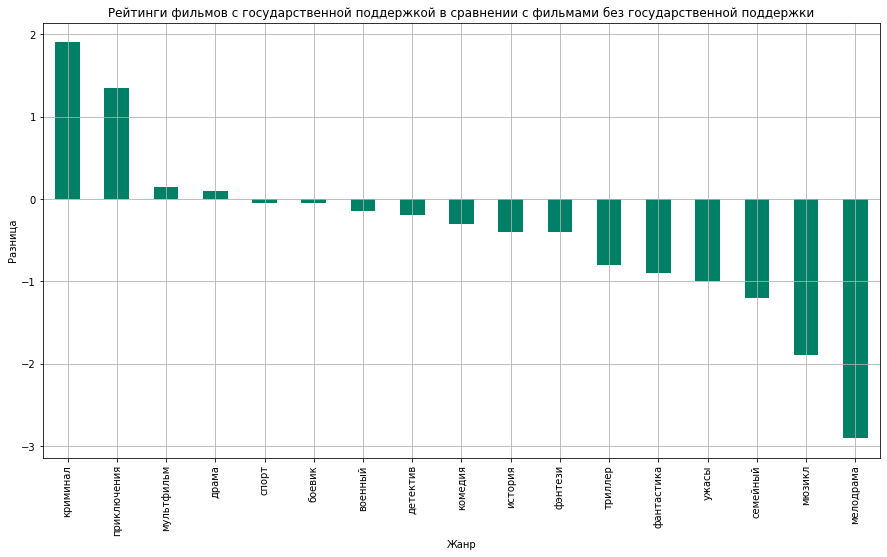

In [128]:
# визуализируем данные, построив график
fund_genres_merge['difference'].loc[fund_genres_merge['difference'].isna() == False] \
                               .sort_values(ascending=False).plot(kind='bar', figsize=(15,8), colormap='summer')
plt.grid(True)

plt.title('Рейтинги фильмов с государственной поддержкой в сравнении с фильмами без государственной поддержки', fontsize=12)
plt.ylabel('Разница')
plt.xlabel('Жанр')
plt.show()

В сравнении с фильмами без государственной поддержки более высокой оценкой зрителей характеризуются жанры "комедия", "приключения". Наибольшая отрицательная разница в рейтинге (более, чем 1 балл) в сравнении с фильмами без государственной поддержки выявлена в жанрах "ужасы", "семейный", "мюзикл", "мелодрама".

**Подведем предварительные итоги**

Всего в рассматриваемом периоде выделено на поддержку отечественного кинематографа 19 672 688 312.0 рублей.
В 2015 году общий объем государственной поддержки составил 3,6 млрд рублей, в 2016 году показатель вырос до 4,23 млрд рублей. В 2017 и 2018 годах наблюдается снижение показателей - 3,14 и 3,3 млрд соответственно. Максимальный объем государственной поддержки приходится на 2019 год - 4,72 млрд рублей.

Дальнейший анализ осуществлен в разрезе двух источников финансирования - Министерства культуры РФ и Фонда кино, поскольку Фонд кино финансирует фильмы для массовой аудитории, в Минкульт обращаются за поддержкой дебютов, авторского, документального и детского кино.

Фильмы, где источником финансирования выступило Министерство культуры, убыточны по результатам кинопроката. Общий убыток составил 5,91 млрд рублей. При этом только объем государственного финансирования составил 4,83 млрд рублей.

Фильмы, где источником финансирования выступил Фонд кино, в целом принесли прибыль по результатам кинопроката. Общая прибыль составила 6,86 млрд рублей. Объем государственного финансирования составил 13,68 млрд рублей.

В 21 фильме источником финансирования указан "Министерство культуры, Фонд кино". Убыток по этим фильмам составил 1,83 млрд рублей, размер государственной поддержки - 1,16 млрд рублей.

*Анализ фильмов, финансируемых Министерством культуры, в том числе с привлечением Фонда кино*

Наблюдается сильная корреляция (0,65) между кассовыми сборами и размером прибыли. Достаточно слабая взаимосвязь характерна для кассовых сборов и государственной поддержки (0,16), кассовых сборов и бюджета фильма (0,34).

Корреляция между бюджетом фильма и государственной поддержкой составляет 0,54.

Выявлена обратная зависимость между бюджетом фильма (-0,49), объемом государственной поддержки (-0,28) и размером прибыли.
Основными жанрами фильмов, поддерживаемых Министерством культуры, являются драма, комедия, мелодрама. 
Прибыль принесли только 2 жанра - боевик и комедия. Остальные жанры убыточны. Наиболее убыточен жанр "драма", но стоит отметить, что фильмы этого жанра в основном поддерживаются Министерством культуры. Вместе с тем финансовый успех в прокате не является целью поддержки фильмов Министерством культуры.

В сравнении с фильмами без государственной поддержки более высокой оценкой зрителей характеризуются жанры "фэнтези", "детектив", "мультфильм", "боевик", "биография", "военный", "комедия", "детский".
Наибольшая отрицательная разница в рейтинге (более, чем 1 балл) в сравнении с фильмами без государственной поддержки выявлена в жанрах "история", "триллер".

Фильмы с наиболее низким рейтингом в сравнении с фильмами без государственной поддержки сняты следующими режиссерами: А.Баршак, А.Калинкин, В.Алеников, В.Шевельков, И.Волкова, И.Волошин, К.Баскакова, К.Худяков, П.Лунгин, Р.Ильясов, С.Саркисов. В будущем целесообразно более внимательно относиться к заявкам, представляемых на фильмы с участием этих режиссеров.

*Анализ фильмов, финансируемых Фондом кино*

Наблюдается сильная корреляция (0,84) между кассовыми сборами и размером прибыли. Достаточно слабая взаимосвязь характерна для кассовых сборов и государственной поддержки (0,44), кассовых сборов и бюджета фильма (0,31).Корреляция между бюджетом фильма и государственной поддержкой составляет 0,71, взаимосвязь существенная. Выявлена слабая обратная зависимость между бюджетом фильма (-0,25) и размером прибыли. Размер государственной поддержки на прибыль практически не влияет.

Основными жанрами фильмов, поддерживаемых Фондом кино, являются комедия, мультфильм, драма. Наиболее успешными в кинопрокате стали следующие жанры фильмов: "комедия", "спорт", "драма". Наименее успешны в прокате фильмы с жанром "фэнтези", "мультфильм", "приключения".

Наиболее успешными в кинопрокате стали фильмы следующих режиссеров: К.Шипенко, А.Мегердичев, А.Сидоров, Д.Дьяченко, О.Трофим, Н.Лебедев, Д.Киселев, Ф.Бондарчук, К.Феоктистов, Ж.Крыжовников.

Наименее успешными в кинопрокате стали фильмы следующих режиссеров: А.Кравчук, А.Учитель, А.Мизгирев, Н.Хомерики, А.Мельник, И.Евланникова, О.Степченко, М.Фадеев, И.Зайцев, В.Лакисов.

В сравнении с фильмами без государственной поддержки более высокой оценкой зрителей характеризуются жанры "комедия", "приключения". Наибольшая отрицательная разница в рейтинге (более, чем 1 балл) в сравнении с фильмами без государственной поддержки выявлена в жанрах "ужасы", "семейный", "мюзикл", "мелодрама".


### Шаг 5. Общий вывод

**Предобработка данных**

За время с 2019 года информация о содержащихся в датасете фильмах на Кинопоиске претерпела изменения, вероятнее всего, данные более качественные, для более полного анализа целесообразно было бы актуализировать данные. 

Типы данных изменены на корректные там, где это было необходимо. 
Проведена обработка пропущенных значений. 

Явные дубликаты отсутствуют. Выявлены дублирующиеся значения в столбцах pu_number и title. Вероятно, наличие дубликатов в столбце с номерами прокатных удостоверений связано с технической ошибкой при присвоении номера в реестре. Наличие дублирующихся значений в столбце title обусловлено тем, что на один фильм может быть выдано несколько прокатных удостоверений лицензиатам на соответствующие способы использования фильма.

Проведена работа по устранению лишних пробелов в категориальных значениях столбцов. Предположительно, лишние пробелы были связаны с техническими ошибками при вводе или выгрузке, поскольку данные без учета пробелов достаточно качественные.

Добавлены столбцы show_start_year (год проката), main_genre (основной жанр), main_director (главный режиссер), support_proportion (доля государственной поддержки от общего бюджета фильма).

**Исследовательский анализ данных**

Значимые для анализа данные появляются с 2014 года. Вероятно, до 2014 года включительно данные не были внесены в полном объеме.

*Доля фильмов в кинопрокате от общего количества фильмов*

Доля фильмов в кинопрокате от общего количества фильмов имела тенденцию к росту с 2010 по 2015 год - с 10,7 до 65,9%%. В 2016 году доля фильмов в кинопрокате снизилась до 64,2%. Пик приходится на 2017 год - 70,6%. В 2018 году доля фильмов в кинопрокате резко снизилась до 53,2%, в 2019 году наблюдается рост доли до 56,9%.

*Динамика проката по годам*

Наблюдается рост сумм сборов в кинопрокате с 2015 года по 2018 год - с 39,5 млрд до 49,5 млрд рублей. Вероятно, это было связано с проведением в 2016 году в Российской Федерации Года российского кино и соответствующими мероприятиями, направленными на поддержку российского кинопроката.
В 2019 году сборы снизились на 1,2 млрд рублей в сравнении с предыдущим годом и составили 48,3 млрд рублей.

*Средняя и медианная сумма сборов для каждого года*

Средние показатели сборов в кинотеатрах имели тенденцию к росту с 2015 по 2017 год - с 85,1 млн руб до 136,3 млн руб. В 2018 году средний показатель сборов снизился и составил 104,6 млн руб., в 2019 году средний показатель продолжил снижаться и составил 91,3 млн рублей.

Медианный показатель сборов в кинотеатрах в 2015 году составлял 4,9 млн руб, в 2016 году произошло снижение до 3,8 млн руб. Максимальный медианный показатель сборов в кинотеатрах наблюдается в 2017 году - 9,9 млн руб., с 2018 медианный показатель снижается - в 2018 году составил 8,75 млн рублей, в 2019 году - 4,6 млн руб.

*Возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.)*

Наибольшая сумма кассовых сборов характерна для категории «16+» - 75.96 млрд рублей. Далее идут сборы категории «12+» - 60.6 млрд рублей, «6+» - 55.4 млрд рублей, «18+» - 40,8 млрд рублей. Минимальные кассовые сборы у возрастной категории «0+» - 0,8 млрд рублей.

При этом стоит отметить, что наибольшее колиичество фильмов приходится на категорию «16+» - 802 фильма, далее на категорию «18+» - 791 фильм. На категории «12+» и «6+» приходится по 346 и 313 фильмов соответственно. Минимальное количество фильмов в категории «0+» - 90.

В каждой возрастной категории имеются фильмы-блокбастеры, влияющие на средние кассовые сборы. Вместе с тем, исходя из границ нормального распределения значений кассовых сборов по каждой возрастной категории можно сделать вывод, что в целом наибольшие кассовые сборы приносят фильмы категории "12+", затем фильмы категории "6+", далее категории "16+", минимальное количество кассовых сборов приносят фильмы с возрастными ограничениями "0+" и "18+".

В 2015 году наибольшая сумма кассовых сборов приходилась на возрастную категорию "12+" - 13,6 млрд рублей, с 2016 по 2018 год наибольшая сумма кассовых сборов приходилась на возрастную категорию "16+" - 16,6, 18,7, 16,5 млрд рублей соответственно. В 2019 году основная доля кассовых сборов приходится на возрастные категории "6+", "12+" и "16+".

**Исследование фильмов, которые получили государственную поддержку**

Всего в рассматриваемом периоде выделено на поддержку отечественного кинематографа 19 672 688 312.0 рублей.
В 2015 году общий объем государственной поддержки составил 3,6 млрд рублей, в 2016 году показатель вырос до 4,23 млрд рублей. В 2017 и 2018 годах наблюдается снижение показателей - 3,14 и 3,3 млрд соответственно. Максимальный объем государственной поддержки приходится на 2019 год - 4,72 млрд рублей.

Дальнейший анализ осуществлен в разрезе двух источников финансирования - Министерства культуры РФ и Фонда кино, поскольку Фонд кино финансирует фильмы для массовой аудитории, в Минкульт обращаются за поддержкой дебютов, авторского, документального и детского кино.

Фильмы, где источником финансирования выступило Министерство культуры, убыточны по результатам кинопроката. Общий убыток составил 5,91 млрд рублей. При этом только объем государственного финансирования составил 4,83 млрд рублей.

Фильмы, где источником финансирования выступил Фонд кино, в целом принесли прибыль по результатам кинопроката. Общая прибыль составила 6,86 млрд рублей. Объем государственного финансирования составил 13,68 млрд рублей.

В 21 фильме источником финансирования указан "Министерство культуры, Фонд кино". Убыток по этим фильмам составил 1,83 млрд рублей, размер государственной поддержки - 1,16 млрд рублей.

*Анализ фильмов, финансируемых Министерством культуры, в том числе с привлечением Фонда кино*

Наблюдается сильная корреляция (0,65) между кассовыми сборами и размером прибыли. Достаточно слабая взаимосвязь характерна для кассовых сборов и государственной поддержки (0,16), кассовых сборов и бюджета фильма (0,34).Корреляция между бюджетом фильма и государственной поддержкой составляет 0,54.

Выявлена обратная зависимость между бюджетом фильма (-0,49), объемом государственной поддержки (-0,28) и размером прибыли.
Основными жанрами фильмов, поддерживаемых Министерством культуры, являются драма, комедия, мелодрама. 
Прибыль принесли только 2 жанра - боевик и комедия. Остальные жанры убыточны. Наиболее убыточен жанр "драма", но стоит отметить, что фильмы этого жанра в основном поддерживаются Министерством культуры. Вместе с тем финансовый успех в прокате не является целью поддержки фильмов Министерством культуры.

В сравнении с фильмами без государственной поддержки более высокой оценкой зрителей характеризуются жанры "фэнтези", "детектив", "мультфильм", "боевик", "биография", "военный", "комедия", "детский".
Наибольшая отрицательная разница в рейтинге (более, чем 1 балл) в сравнении с фильмами без государственной поддержки выявлена в жанрах "история", "триллер".
Фильмы с наиболее низким рейтингом в сравнении с фильмами без государственной поддержки сняты следующими режиссерами: А.Баршак, А.Калинкин, В.Алеников, В.Шевельков, И.Волкова, И.Волошин, К.Баскакова, К.Худяков, П.Лунгин, Р.Ильясов, С.Саркисов. В будущем целесообразно более внимательно относиться к заявкам, представляемых на фильмы с участием этих режиссеров.
Анализ фильмов, финансируемых Фондом кино

Наблюдается сильная корреляция (0,84) между кассовыми сборами и размером прибыли. Достаточно слабая взаимосвязь характерна для кассовых сборов и государственной поддержки (0,44), кассовых сборов и бюджета фильма (0,31).

Корреляция между бюджетом фильма и государственной поддержкой составляет 0,71, взаимосвязь существенная.

Выявлена слабая обратная зависимость между бюджетом фильма (-0,25) и размером прибыли. Размер государственной поддержки на прибыль практически не влияет.
Основными жанрами фильмов, поддерживаемых Фондом кино, являются комедия, мультфильм, драма. Наиболее успешными в кинопрокате стали следующие жанры фильмов: "комедия", "спорт", "драма". Наименее успешны в прокате фильмы с жанром "фэнтези", "мультфильм", "приключения".
Наиболее успешными в кинопрокате стали фильмы следующих режиссеров: К.Шипенко, А.Мегердичев, А.Сидоров, Д.Дьяченко, О.Трофим, Н.Лебедев, Д.Киселев, Ф.Бондарчук, К.Феоктистов, Ж.Крыжовников.
Наименее успешными в кинопрокате стали фильмы следующих режиссеров: А.Кравчук, А.Учитель, А.Мизгирев, Н.Хомерики, А.Мельник, И.Евланникова, О.Степченко, М.Фадеев, И.Зайцев, В.Лакисов.
В сравнении с фильмами без государственной поддержки более высокой оценкой зрителей характеризуются жанры "комедия", "приключения". Наибольшая отрицательная разница в рейтинге (более, чем 1 балл) в сравнении с фильмами без государственной поддержки выявлена в жанрах "ужасы", "семейный", "мюзикл", "мелодрама".
